# Case Petz vaga de cientista de dados Jr

# An√°lise de Interna√ß√µes no Sistema de Sa√∫de Brasileiro

**Introdu√ß√£o**

Voc√™ foi contratado(a) para fazer uma an√°lise apurada do n√∫mero de interna√ß√µes no
sistema de sa√∫de brasileiro. Esta an√°lise √© de extrema import√¢ncia para tomada de
decis√µes que dever√£o contribuir para melhorias no sistema e planejamento estrat√©gico.
Os dados em anexo (case_internacao_SUS.xls) s√£o referentes √†s interna√ß√µes que
ocorreram no pa√≠s durante o per√≠odo de dezembro de 2017 a julho de 2019, separados
por regi√£o e unidade de federa√ß√£o (Fonte: Minist√©rio da Sa√∫de - Sistema de Informa√ß√µes
Hospitalares do SUS (SIH/SUS)).

**Base de dados**

- Link: http://tabnet.datasus.gov.br/cgi/sih/sxdescr.htm 

**Tratamento dos dados**


- 1: Muitas vezes, cerca de 70% do tempo de um projeto √© despendido na coleta e tratamento dos dados. Sabendo disso, leia o arquivo e o transforme de modo a ter mais facilidade em analisar os dados. Lembre-se que essa etapa poder√° te dar bons insumos.



**An√°lise**


- 2: Dados tratados, bora explor√°-los? Fa√ßa uma boa EDA e n√£o esque√ßa de anotar todos os insights que voc√™ obter. Gr√°ficos e informa√ß√µes sem uma boa interpreta√ß√£o n√£o valem, ok?



**Modelagem**


- 3: Agora que j√° tem certa intimidade com os dados, cite pelo menos 2 m√©todos poss√≠veis para estimar os dados para os meses faltantes. Tente n√£o se complicar aqui. Utilize os m√©todos mais simples e mais funcionais poss√≠veis. Neste t√≥pico, √© importante que argumente o porqu√™ dos m√©todos recomendados.Escolha um desses m√©todos e estime. 


- a) o n√∫mero de Interna√ß√µes.

- b) o Valor Total das interna√ß√µes nos per√≠odos faltantes.



**Crie um modelo que preveja** 


- a) As Interna√ß√µes.


- b) O n√∫mero de √ìbitos.


- c) O Valor M√©dio de AIH pelos pr√≥ximos 6 meses. 

Explique a escolha do modelo e quais par√¢metros utilizou para serem input no modelo.



**Planejamento estrat√©gico**

- Com base nos dados e nas suas an√°lises, que tipo de estrat√©gia voc√™ sugeriria para diminuir o n√∫mero de interna√ß√µes em hospitais do SUS? E para o Estado de S√£o Paulo? Quais especificidades deveriam ser levadas em conta?


# 0 - Importa√ß√£o das bibliotecas

In [111]:
# Vers√£o do python
from platform import python_version

print('Vers√£o python neste Jupyter Notebook:', python_version())

Vers√£o python neste Jupyter Notebook: 3.9.7


In [112]:
# Importa√ß√£o das bibliotecas 

import pandas as pd # Pandas carregamento csv
import numpy as np # Numpy para carregamento c√°lculos em arrays multidimensionais

# Visualiza√ß√£o de dados
import seaborn as sns
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

# Carregar as vers√µes das bibliotecas
import watermark

# Warnings retirar alertas 
import warnings
warnings.filterwarnings("ignore")

In [113]:
# Vers√µes das bibliotecas

%reload_ext watermark
%watermark -a "Vers√µes das bibliotecas" --iversions

Author: Vers√µes das bibliotecas

numpy     : 1.20.3
seaborn   : 0.11.2
pandas    : 1.3.4
watermark : 2.2.0
plotly    : 5.5.0
matplotlib: 3.4.3



In [114]:
# Configura√ß√£o para os gr√°ficos largura e layout dos graficos

plt.rcParams["figure.figsize"] = (25, 20)

plt.style.use('fivethirtyeight')
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

m.rcParams['axes.labelsize'] = 25
m.rcParams['xtick.labelsize'] = 25
m.rcParams['ytick.labelsize'] = 25
m.rcParams['text.color'] = 'k'

# 0.1) Base de dados

In [115]:
# Carregando a base de dados
base = pd.read_excel('case_internacao_SUS.xls', sheet_name=None)

In [116]:
base_1 = pd.DataFrame()
for key in base.keys():
    base_df = base[key]
    base_df['data'] = key
    base_1 = pd.concat([base_1, base_df], axis=0)
    

base_1.head()

Regi√£o/Unidade da Federa√ß√£o  Interna√ß√µes  AIH_aprovadas  Valor_total  Valor_servi√ßos_hospitalares Val_serv_hosp_-_compl_federal Val_serv_hosp_-_compl_gestor  Valor_servi√ßos_profissionais Val_serv_prof_-_compl_federal Val_serv_prof_-_compl_gestor  Valor_m√©dio_AIH  Valor_m√©dio_intern  Dias_perman√™ncia  M√©dia_perman√™ncia  √ìbitos  Taxa_mortalidade   data
0                Regi√£o Norte      75363.0        75363.0  65821821.59                  50592273.10                     282125.28                            -                   14820122.53                             -                            -           873.40              873.40          358202.0                4.8  2149.0              2.85  jul19
1                 .. Rond√¥nia       9603.0         9603.0   9404751.41                   7666945.90                             -                            -                    1737805.51                             -                            -           979.36              979.36           53043.0                5.5   315.0              3.28  jul19
2                 .. Amazonas      16248.0        16248.0  15624312.73                  12166634.07                       1221.31                            -                    3455637.92                             -                            -           961.61              961.61           85512.0                5.3   536.0              3.30  jul19
3                  .. Roraima       4324.0         4324.0   3137537.40                   2356231.68                             -                            -                     781305.72                             -                            -           725.61              725.61           25560.0                5.9   171.0              3.95  jul19
4                     .. Par√°      34774.0        34774.0  28178633.44                  21241354.07                     248197.25                            -                    6581738.70                             -                            -           810.34              810.34          138135.0                4.0   832.0              2.39  jul19

# 0.2) Descri√ß√£o dados

- Verifica√ß√£o de linhas colunas informa√ß√£os dos dados e tipos de vari√°veis. Valores das colunas verficando dados nulos ou vazios.

In [117]:
# Exibido 5 primeiros dados
base_1.head()

Regi√£o/Unidade da Federa√ß√£o  Interna√ß√µes  AIH_aprovadas  Valor_total  Valor_servi√ßos_hospitalares Val_serv_hosp_-_compl_federal Val_serv_hosp_-_compl_gestor  Valor_servi√ßos_profissionais Val_serv_prof_-_compl_federal Val_serv_prof_-_compl_gestor  Valor_m√©dio_AIH  Valor_m√©dio_intern  Dias_perman√™ncia  M√©dia_perman√™ncia  √ìbitos  Taxa_mortalidade   data
0                Regi√£o Norte      75363.0        75363.0  65821821.59                  50592273.10                     282125.28                            -                   14820122.53                             -                            -           873.40              873.40          358202.0                4.8  2149.0              2.85  jul19
1                 .. Rond√¥nia       9603.0         9603.0   9404751.41                   7666945.90                             -                            -                    1737805.51                             -                            -           979.36              979.36           53043.0                5.5   315.0              3.28  jul19
2                 .. Amazonas      16248.0        16248.0  15624312.73                  12166634.07                       1221.31                            -                    3455637.92                             -                            -           961.61              961.61           85512.0                5.3   536.0              3.30  jul19
3                  .. Roraima       4324.0         4324.0   3137537.40                   2356231.68                             -                            -                     781305.72                             -                            -           725.61              725.61           25560.0                5.9   171.0              3.95  jul19
4                     .. Par√°      34774.0        34774.0  28178633.44                  21241354.07                     248197.25                            -                    6581738.70                             -                            -           810.34              810.34          138135.0                4.0   832.0              2.39  jul19

In [118]:
# Exibido 5 √∫ltimos dados 
base_1.tail()

Regi√£o/Unidade da Federa√ß√£o  Interna√ß√µes  AIH_aprovadas   Valor_total  Valor_servi√ßos_hospitalares Val_serv_hosp_-_compl_federal Val_serv_hosp_-_compl_gestor  Valor_servi√ßos_profissionais Val_serv_prof_-_compl_federal Val_serv_prof_-_compl_gestor  Valor_m√©dio_AIH  Valor_m√©dio_intern  Dias_perman√™ncia  M√©dia_perman√™ncia   √ìbitos  Taxa_mortalidade   data
29              .. Mato Grosso      14710.0        14786.0  1.526207e+07                 1.225791e+07                        970.38                            -                  3.002676e+06                             -                            -          1032.20             1037.53           69397.0                4.7    617.0              4.19  fev19
30                    .. Goi√°s      26070.0        26646.0  3.359975e+07                 2.662306e+07                     327025.06                    220665.44                  6.267858e+06                     220665.44                      7093.39          1260.97             1288.83          125461.0                4.8    920.0              3.53  fev19
31         .. Distrito Federal      18473.0        18502.0  1.849633e+07                 1.477508e+07                             -                            -                  3.721253e+06                             -                            -           999.69             1001.26          104719.0                5.7    499.0              2.70  fev19
32                       Total     947202.0       961714.0  1.226362e+09                 9.773662e+08                    3253568.73                    350177.94                  2.433945e+08                     350177.94                    244937.51          1275.18             1294.72         4968008.0                5.2  39496.0              4.17  fev19
33                                      NaN            NaN           NaN                          NaN                           NaN                          NaN                           NaN                           NaN                          NaN              NaN                 NaN               NaN                NaN      NaN               NaN  fev19

In [119]:
# N√∫mero de linhas e colunas
base_1.shape

(480, 17)

In [120]:
# Verificando informa√ß√µes das variaveis
base_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 0 to 33
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Regi√£o/Unidade da Federa√ß√£o    475 non-null    object 
 1   Interna√ß√µes                    461 non-null    float64
 2   AIH_aprovadas                  461 non-null    float64
 3   Valor_total                    461 non-null    float64
 4   Valor_servi√ßos_hospitalares    461 non-null    float64
 5   Val_serv_hosp_-_compl_federal  461 non-null    object 
 6   Val_serv_hosp_-_compl_gestor   461 non-null    object 
 7   Valor_servi√ßos_profissionais   461 non-null    float64
 8   Val_serv_prof_-_compl_federal  461 non-null    object 
 9   Val_serv_prof_-_compl_gestor   461 non-null    object 
 10  Valor_m√©dio_AIH                461 non-null    float64
 11  Valor_m√©dio_intern             461 non-null    float64
 12  Dias_perman√™ncia               461 non-nu

In [121]:
# Exibido tipos de dados
base_1.dtypes

Regi√£o/Unidade da Federa√ß√£o       object
Interna√ß√µes                      float64
AIH_aprovadas                    float64
Valor_total                      float64
Valor_servi√ßos_hospitalares      float64
Val_serv_hosp_-_compl_federal     object
Val_serv_hosp_-_compl_gestor      object
Valor_servi√ßos_profissionais     float64
Val_serv_prof_-_compl_federal     object
Val_serv_prof_-_compl_gestor      object
Valor_m√©dio_AIH                  float64
Valor_m√©dio_intern               float64
Dias_perman√™ncia                 float64
M√©dia_perman√™ncia                float64
√ìbitos                           float64
Taxa_mortalidade                 float64
data                              object
dtype: object

In [122]:
# Total de colunas e linhas 

print("N√∫meros de linhas: {}" .format(base_1.shape[0]))
print("N√∫meros de colunas: {}" .format(base_1.shape[1]))

N√∫meros de linhas: 480
N√∫meros de colunas: 17


In [123]:
# Exibindo valores ausentes e valores √∫nicos

print("\nMissing values :  ", base_1.isnull().sum().values.sum())
print("\nUnique values :  \n",base_1.nunique())


Missing values :   290

Unique values :  
 Regi√£o/Unidade da Federa√ß√£o       34
Interna√ß√µes                      456
AIH_aprovadas                    458
Valor_total                      461
Valor_servi√ßos_hospitalares      461
Val_serv_hosp_-_compl_federal    336
Val_serv_hosp_-_compl_gestor     102
Valor_servi√ßos_profissionais     461
Val_serv_prof_-_compl_federal    102
Val_serv_prof_-_compl_gestor      90
Valor_m√©dio_AIH                  460
Valor_m√©dio_intern               458
Dias_perman√™ncia                 461
M√©dia_perman√™ncia                 37
√ìbitos                           429
Taxa_mortalidade                 254
data                              14
dtype: int64


# 0.3) Verifica√ß√£o dos dados



In [124]:
# C√≥pia de seguran√ßa dos dados
data_1 = base_1.copy()

# Renomeando colunas
n_1 = data_1.columns
n_2 = lambda x: x.lower()
base = list(map(n_2, n_1))

data_1.columns = base
data_1.columns = ["Regi√£o",
                  "Interna√ß√µes",
                  "AIH_aprovadas",
                  "Valor_total",
                  "Valor_servi√ßos_hospitalares",
                  "Val_serv_hosp_compl_federal",
                  "Val_serv_hosp_compl_gestor",
                  "Valor_servi√ßos_profissionais",
                  "Val_serv_prof_compl_federal",
                  "Val_serv_prof_compl_gestor",
                  "Valor_m√©dio_AIH",
                  "Valor_m√©dio_intern",
                  "Dias_perman√™ncia",
                  "M√©dia_perman√™ncia",
                  "√ìbitos",
                  "Taxa_mortalidade",
                  "Data"]

data_1.head()

Regi√£o  Interna√ß√µes  AIH_aprovadas  Valor_total  Valor_servi√ßos_hospitalares Val_serv_hosp_compl_federal Val_serv_hosp_compl_gestor  Valor_servi√ßos_profissionais Val_serv_prof_compl_federal Val_serv_prof_compl_gestor  Valor_m√©dio_AIH  Valor_m√©dio_intern  Dias_perman√™ncia  M√©dia_perman√™ncia  √ìbitos  Taxa_mortalidade   Data
0  Regi√£o Norte      75363.0        75363.0  65821821.59                  50592273.10                   282125.28                          -                   14820122.53                           -                          -           873.40              873.40          358202.0                4.8  2149.0              2.85  jul19
1   .. Rond√¥nia       9603.0         9603.0   9404751.41                   7666945.90                           -                          -                    1737805.51                           -                          -           979.36              979.36           53043.0                5.5   315.0              3.28  jul19
2   .. Amazonas      16248.0        16248.0  15624312.73                  12166634.07                     1221.31                          -                    3455637.92                           -                          -           961.61              961.61           85512.0                5.3   536.0              3.30  jul19
3    .. Roraima       4324.0         4324.0   3137537.40                   2356231.68                           -                          -                     781305.72                           -                          -           725.61              725.61           25560.0                5.9   171.0              3.95  jul19
4       .. Par√°      34774.0        34774.0  28178633.44                  21241354.07                   248197.25                          -                    6581738.70                           -                          -           810.34              810.34          138135.0                4.0   832.0              2.39  jul19

In [125]:
# Dados faltantes coluna √≥bitos

data = data_1[data_1["√ìbitos"].notnull()]
data.isna().sum()

Regi√£o                          0
Interna√ß√µes                     0
AIH_aprovadas                   0
Valor_total                     0
Valor_servi√ßos_hospitalares     0
Val_serv_hosp_compl_federal     0
Val_serv_hosp_compl_gestor      0
Valor_servi√ßos_profissionais    0
Val_serv_prof_compl_federal     0
Val_serv_prof_compl_gestor      0
Valor_m√©dio_AIH                 0
Valor_m√©dio_intern              0
Dias_perman√™ncia                0
M√©dia_perman√™ncia               0
√ìbitos                          0
Taxa_mortalidade                0
Data                            0
dtype: int64

In [126]:
# Dados faltantes colunas internacoes

data = data_1[data_1["Interna√ß√µes"].notnull()]
data.isna().sum()

Regi√£o                          0
Interna√ß√µes                     0
AIH_aprovadas                   0
Valor_total                     0
Valor_servi√ßos_hospitalares     0
Val_serv_hosp_compl_federal     0
Val_serv_hosp_compl_gestor      0
Valor_servi√ßos_profissionais    0
Val_serv_prof_compl_federal     0
Val_serv_prof_compl_gestor      0
Valor_m√©dio_AIH                 0
Valor_m√©dio_intern              0
Dias_perman√™ncia                0
M√©dia_perman√™ncia               0
√ìbitos                          0
Taxa_mortalidade                0
Data                            0
dtype: int64

In [127]:
# Removendo dados ausentes do dataset 

data_1 = data_1.dropna()
data_1.head()

Regi√£o  Interna√ß√µes  AIH_aprovadas  Valor_total  Valor_servi√ßos_hospitalares Val_serv_hosp_compl_federal Val_serv_hosp_compl_gestor  Valor_servi√ßos_profissionais Val_serv_prof_compl_federal Val_serv_prof_compl_gestor  Valor_m√©dio_AIH  Valor_m√©dio_intern  Dias_perman√™ncia  M√©dia_perman√™ncia  √ìbitos  Taxa_mortalidade   Data
0  Regi√£o Norte      75363.0        75363.0  65821821.59                  50592273.10                   282125.28                          -                   14820122.53                           -                          -           873.40              873.40          358202.0                4.8  2149.0              2.85  jul19
1   .. Rond√¥nia       9603.0         9603.0   9404751.41                   7666945.90                           -                          -                    1737805.51                           -                          -           979.36              979.36           53043.0                5.5   315.0              3.28  jul19
2   .. Amazonas      16248.0        16248.0  15624312.73                  12166634.07                     1221.31                          -                    3455637.92                           -                          -           961.61              961.61           85512.0                5.3   536.0              3.30  jul19
3    .. Roraima       4324.0         4324.0   3137537.40                   2356231.68                           -                          -                     781305.72                           -                          -           725.61              725.61           25560.0                5.9   171.0              3.95  jul19
4       .. Par√°      34774.0        34774.0  28178633.44                  21241354.07                   248197.25                          -                    6581738.70                           -                          -           810.34              810.34          138135.0                4.0   832.0              2.39  jul19

In [128]:
# Sum() Retorna a soma dos valores sobre o eixo solicitado
# Isna() Detecta valores ausentes

data_1.isna().sum()

Regi√£o                          0
Interna√ß√µes                     0
AIH_aprovadas                   0
Valor_total                     0
Valor_servi√ßos_hospitalares     0
Val_serv_hosp_compl_federal     0
Val_serv_hosp_compl_gestor      0
Valor_servi√ßos_profissionais    0
Val_serv_prof_compl_federal     0
Val_serv_prof_compl_gestor      0
Valor_m√©dio_AIH                 0
Valor_m√©dio_intern              0
Dias_perman√™ncia                0
M√©dia_perman√™ncia               0
√ìbitos                          0
Taxa_mortalidade                0
Data                            0
dtype: int64

In [129]:
# Retorna a soma dos valores sobre o eixo solicitado
# Detecta valores n√£o ausentes para um objeto semelhante a uma matriz.

data_1.notnull().sum()

Regi√£o                          461
Interna√ß√µes                     461
AIH_aprovadas                   461
Valor_total                     461
Valor_servi√ßos_hospitalares     461
Val_serv_hosp_compl_federal     461
Val_serv_hosp_compl_gestor      461
Valor_servi√ßos_profissionais    461
Val_serv_prof_compl_federal     461
Val_serv_prof_compl_gestor      461
Valor_m√©dio_AIH                 461
Valor_m√©dio_intern              461
Dias_perman√™ncia                461
M√©dia_perman√™ncia               461
√ìbitos                          461
Taxa_mortalidade                461
Data                            461
dtype: int64

In [130]:
# Total de n√∫mero duplicados

data_1.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
28    False
29    False
30    False
31    False
32    False
Length: 461, dtype: bool

In [131]:
# Renomeando estados por regi√£o 

data_1["Regi√£o"].unique()

array(['Regi√£o Norte', '.. Rond√¥nia', '.. Amazonas', '.. Roraima',
       '.. Par√°', '.. Amap√°', '.. Tocantins', 'Regi√£o Nordeste',
       '.. Maranh√£o', '.. Piau√≠', '.. Cear√°', '.. Rio Grande do Norte',
       '.. Para√≠ba', '.. Pernambuco', '.. Alagoas', '.. Sergipe',
       '.. Bahia', 'Regi√£o Sudeste', '.. Minas Gerais',
       '.. Esp√≠rito Santo', '.. Rio de Janeiro', '.. S√£o Paulo',
       'Regi√£o Sul', '.. Paran√°', '.. Santa Catarina',
       '.. Rio Grande do Sul', 'Regi√£o Centro-Oeste',
       '.. Mato Grosso do Sul', '.. Mato Grosso', '.. Goi√°s',
       '.. Distrito Federal', 'Total', '.. Acre'], dtype=object)

In [132]:
# Regi√£oes que t√™m pontos(.) antes dos nomes 

data_1 = data_1[data_1['Regi√£o'].str.contains('.', regex=False)]
data_1['Regi√£o'].unique()

array(['.. Rond√¥nia', '.. Amazonas', '.. Roraima', '.. Par√°', '.. Amap√°',
       '.. Tocantins', '.. Maranh√£o', '.. Piau√≠', '.. Cear√°',
       '.. Rio Grande do Norte', '.. Para√≠ba', '.. Pernambuco',
       '.. Alagoas', '.. Sergipe', '.. Bahia', '.. Minas Gerais',
       '.. Esp√≠rito Santo', '.. Rio de Janeiro', '.. S√£o Paulo',
       '.. Paran√°', '.. Santa Catarina', '.. Rio Grande do Sul',
       '.. Mato Grosso do Sul', '.. Mato Grosso', '.. Goi√°s',
       '.. Distrito Federal', '.. Acre'], dtype=object)

In [133]:
# Estados vazios

data_1[data_1["Regi√£o"].isnull()]

Empty DataFrame
Columns: [Regi√£o, Interna√ß√µes, AIH_aprovadas, Valor_total, Valor_servi√ßos_hospitalares, Val_serv_hosp_compl_federal, Val_serv_hosp_compl_gestor, Valor_servi√ßos_profissionais, Val_serv_prof_compl_federal, Val_serv_prof_compl_gestor, Valor_m√©dio_AIH, Valor_m√©dio_intern, Dias_perman√™ncia, M√©dia_perman√™ncia, √ìbitos, Taxa_mortalidade, Data]
Index: []

In [134]:
# Estados vazios um filtro de estados n√£o nulos

data_1 = data_1[data_1['Regi√£o'].notnull()]
data_1.head()

Regi√£o  Interna√ß√µes  AIH_aprovadas  Valor_total  Valor_servi√ßos_hospitalares Val_serv_hosp_compl_federal Val_serv_hosp_compl_gestor  Valor_servi√ßos_profissionais Val_serv_prof_compl_federal Val_serv_prof_compl_gestor  Valor_m√©dio_AIH  Valor_m√©dio_intern  Dias_perman√™ncia  M√©dia_perman√™ncia  √ìbitos  Taxa_mortalidade   Data
1  .. Rond√¥nia       9603.0         9603.0   9404751.41                   7666945.90                           -                          -                    1737805.51                           -                          -           979.36              979.36           53043.0                5.5   315.0              3.28  jul19
2  .. Amazonas      16248.0        16248.0  15624312.73                  12166634.07                     1221.31                          -                    3455637.92                           -                          -           961.61              961.61           85512.0                5.3   536.0              3.30  jul19
3   .. Roraima       4324.0         4324.0   3137537.40                   2356231.68                           -                          -                     781305.72                           -                          -           725.61              725.61           25560.0                5.9   171.0              3.95  jul19
4      .. Par√°      34774.0        34774.0  28178633.44                  21241354.07                   248197.25                          -                    6581738.70                           -                          -           810.34              810.34          138135.0                4.0   832.0              2.39  jul19
5     .. Amap√°       3407.0         3407.0   2380727.69                   1776869.35                           -                          -                     603858.34                           -                          -           698.78              698.78           18703.0                5.5    85.0              2.49  jul19

# 0.4) Informa√ß√£o e remo√ß√£o texto nas colunas 

**AIH - Aprovadas no per√≠odo sem considerar prorroga√ß√£o**
- Uma parte importante para interna√ß√£o hospitalar.

In [135]:
# Remo√ß√£o de pontos 

data_1 = data_1[data_1['Regi√£o'].str.contains('.', regex=False)]
data_1['Regi√£o'].unique()

array(['.. Rond√¥nia', '.. Amazonas', '.. Roraima', '.. Par√°', '.. Amap√°',
       '.. Tocantins', '.. Maranh√£o', '.. Piau√≠', '.. Cear√°',
       '.. Rio Grande do Norte', '.. Para√≠ba', '.. Pernambuco',
       '.. Alagoas', '.. Sergipe', '.. Bahia', '.. Minas Gerais',
       '.. Esp√≠rito Santo', '.. Rio de Janeiro', '.. S√£o Paulo',
       '.. Paran√°', '.. Santa Catarina', '.. Rio Grande do Sul',
       '.. Mato Grosso do Sul', '.. Mato Grosso', '.. Goi√°s',
       '.. Distrito Federal', '.. Acre'], dtype=object)

In [136]:
# Uma limpeza na coluna "Regi√£o"

data_1['Regi√£o'] = data_1['Regi√£o'].apply(lambda x: x.replace('.',''))
data_1['Regi√£o'] = data_1['Regi√£o'].apply(lambda x: x.lstrip())
data_1['Regi√£o'] = data_1['Regi√£o'].apply(lambda x: x.rstrip())

estados_df = {
    'AC': 'Acre',
    'AL': 'Alagoas',
    'AP': 'Amap√°',
    'AM': 'Amazonas',
    'BA': 'Bahia',
    'CE': 'Cear√°',
    'DF': 'Distrito Federal',
    'ES': 'Esp√≠rito Santo',
    'GO': 'Goi√°s',
    'MA': 'Maranh√£o',
    'MT': 'Mato Grosso',
    'MS': 'Mato Grosso do Sul',
    'MG': 'Minas Gerais',
    'PA': 'Par√°',
    'PB': 'Para√≠ba',
    'PR': 'Paran√°',
    'PE': 'Pernambuco',
    'PI': 'Piau√≠',
    'RJ': 'Rio de Janeiro',
    'RN': 'Rio Grande do Norte',
    'RS': 'Rio Grande do Sul',
    'RO': 'Rond√¥nia',
    'RR': 'Roraima',
    'SC': 'Santa Catarina',
    'SP': 'S√£o Paulo',
    'SE': 'Sergipe',
    'TO': 'Tocantins'
}

df_estados = {v: k for k, v in estados_df.items()}
data_1['Regi√£o'] = data_1['Regi√£o'].map(df_estados)

for i in data_1.columns:
    data_1[data_1[i] == '-'] = data_1[data_1[i] == '-'].apply(lambda x: x.replace('-', np.NaN))

# Separando m√™s e ano nos dados

data_1['mes'] = data_1['Data'].apply(lambda x: x[0:3])
data_1['ano'] = data_1['Data'].apply(lambda x: x[-2:])

# Nessa etapa substituindo meses extensos

meses = {'jan':'1', 
         'fev':'2', 
         'mar':'3', 
         'abr':'4', 
         'mai':'5', 
         'jun':'6', 
         'jul':'7', 
         'ago':'8', 
         'set':'9', 
         'out':'10', 
         'nov':'11', 
         'dez':'12'}

for k,v in meses.items():
    data_1['mes'] = data_1['mes'].apply(lambda x: x.replace(k,v))
    
# Transformando dados ano para 4 d√≠gitos

data_1['ano'] = data_1['ano'].apply(lambda x: '20'+x)

# Os dados em datas

data_1["data"] = data_1["ano"] + "-" + data_1["mes"]

# Visualizando o dataset completo

data_1.head()

Regi√£o  Interna√ß√µes  AIH_aprovadas  Valor_total  Valor_servi√ßos_hospitalares Val_serv_hosp_compl_federal Val_serv_hosp_compl_gestor  Valor_servi√ßos_profissionais Val_serv_prof_compl_federal Val_serv_prof_compl_gestor  Valor_m√©dio_AIH  Valor_m√©dio_intern  Dias_perman√™ncia  M√©dia_perman√™ncia  √ìbitos  Taxa_mortalidade   Data mes   ano    data
1     RO       9603.0         9603.0   9404751.41                   7666945.90                         NaN                        NaN                    1737805.51                         NaN                        NaN           979.36              979.36           53043.0                5.5   315.0              3.28  jul19   7  2019  2019-7
2     AM      16248.0        16248.0  15624312.73                  12166634.07                     1221.31                        NaN                    3455637.92                         NaN                        NaN           961.61              961.61           85512.0                5.3   536.0              3.30  jul19   7  2019  2019-7
3     RR       4324.0         4324.0   3137537.40                   2356231.68                         NaN                        NaN                     781305.72                         NaN                        NaN           725.61              725.61           25560.0                5.9   171.0              3.95  jul19   7  2019  2019-7
4     PA      34774.0        34774.0  28178633.44                  21241354.07                   248197.25                        NaN                    6581738.70                         NaN                        NaN           810.34              810.34          138135.0                4.0   832.0              2.39  jul19   7  2019  2019-7
5     AP       3407.0         3407.0   2380727.69                   1776869.35                         NaN                        NaN                     603858.34                         NaN                        NaN           698.78              698.78           18703.0                5.5    85.0              2.49  jul19   7  2019  2019-7

# 0.5) - Limpeza da base de dados

- Alguns dados tinha dados ausentes e nulos dentro do dataset.

In [137]:
# Limpando a base de dados

data_1.drop(columns=["Val_serv_hosp_compl_federal", 
                     "Val_serv_hosp_compl_gestor", 
                     "Val_serv_prof_compl_federal",
                     "Val_serv_prof_compl_gestor",
                     "Data"], inplace = True)
data_1.head()

Regi√£o  Interna√ß√µes  AIH_aprovadas  Valor_total  Valor_servi√ßos_hospitalares  Valor_servi√ßos_profissionais  Valor_m√©dio_AIH  Valor_m√©dio_intern  Dias_perman√™ncia  M√©dia_perman√™ncia  √ìbitos  Taxa_mortalidade mes   ano    data
1     RO       9603.0         9603.0   9404751.41                   7666945.90                    1737805.51           979.36              979.36           53043.0                5.5   315.0              3.28   7  2019  2019-7
2     AM      16248.0        16248.0  15624312.73                  12166634.07                    3455637.92           961.61              961.61           85512.0                5.3   536.0              3.30   7  2019  2019-7
3     RR       4324.0         4324.0   3137537.40                   2356231.68                     781305.72           725.61              725.61           25560.0                5.9   171.0              3.95   7  2019  2019-7
4     PA      34774.0        34774.0  28178633.44                  21241354.07                    6581738.70           810.34              810.34          138135.0                4.0   832.0              2.39   7  2019  2019-7
5     AP       3407.0         3407.0   2380727.69                   1776869.35                     603858.34           698.78              698.78           18703.0                5.5    85.0              2.49   7  2019  2019-7

In [138]:
# Salvando o dataset para modelo 2

data_1.to_csv('data1.csv', index=False)

In [139]:
# Convertendo os dados para tipo datetime

data_1['data'] = pd.to_datetime(data_1['data'], format='%Y-%m')
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 1 to 31
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Regi√£o                        377 non-null    object        
 1   Interna√ß√µes                   377 non-null    float64       
 2   AIH_aprovadas                 377 non-null    float64       
 3   Valor_total                   377 non-null    float64       
 4   Valor_servi√ßos_hospitalares   377 non-null    float64       
 5   Valor_servi√ßos_profissionais  377 non-null    float64       
 6   Valor_m√©dio_AIH               377 non-null    float64       
 7   Valor_m√©dio_intern            377 non-null    float64       
 8   Dias_perman√™ncia              377 non-null    float64       
 9   M√©dia_perman√™ncia             377 non-null    float64       
 10  √ìbitos                        377 non-null    float64       
 11  Taxa_mortalidade      

In [140]:
# Dados faltantes

data_1.fillna(0, inplace=True)
data_1.head()

Regi√£o  Interna√ß√µes  AIH_aprovadas  Valor_total  Valor_servi√ßos_hospitalares  Valor_servi√ßos_profissionais  Valor_m√©dio_AIH  Valor_m√©dio_intern  Dias_perman√™ncia  M√©dia_perman√™ncia  √ìbitos  Taxa_mortalidade mes   ano       data
1     RO       9603.0         9603.0   9404751.41                   7666945.90                    1737805.51           979.36              979.36           53043.0                5.5   315.0              3.28   7  2019 2019-07-01
2     AM      16248.0        16248.0  15624312.73                  12166634.07                    3455637.92           961.61              961.61           85512.0                5.3   536.0              3.30   7  2019 2019-07-01
3     RR       4324.0         4324.0   3137537.40                   2356231.68                     781305.72           725.61              725.61           25560.0                5.9   171.0              3.95   7  2019 2019-07-01
4     PA      34774.0        34774.0  28178633.44                  21241354.07                    6581738.70           810.34              810.34          138135.0                4.0   832.0              2.39   7  2019 2019-07-01
5     AP       3407.0         3407.0   2380727.69                   1776869.35                     603858.34           698.78              698.78           18703.0                5.5    85.0              2.49   7  2019 2019-07-01

In [141]:
# Per√≠odos faltantes

sorted(data_1['data'].unique())

[numpy.datetime64('2017-12-01T00:00:00.000000000'),
 numpy.datetime64('2018-03-01T00:00:00.000000000'),
 numpy.datetime64('2018-04-01T00:00:00.000000000'),
 numpy.datetime64('2018-05-01T00:00:00.000000000'),
 numpy.datetime64('2018-07-01T00:00:00.000000000'),
 numpy.datetime64('2018-08-01T00:00:00.000000000'),
 numpy.datetime64('2018-09-01T00:00:00.000000000'),
 numpy.datetime64('2018-11-01T00:00:00.000000000'),
 numpy.datetime64('2018-12-01T00:00:00.000000000'),
 numpy.datetime64('2019-01-01T00:00:00.000000000'),
 numpy.datetime64('2019-02-01T00:00:00.000000000'),
 numpy.datetime64('2019-04-01T00:00:00.000000000'),
 numpy.datetime64('2019-06-01T00:00:00.000000000'),
 numpy.datetime64('2019-07-01T00:00:00.000000000')]

# 0.6) Estat√≠stica descritiva

In [142]:
# Exibindo estat√≠sticas descritivas visualizar alguns detalhes estat√≠sticos b√°sicos como percentil, m√©dia, padr√£o, etc. 
# De um quadro de dados ou uma s√©rie de valores num√©ricos.

data_1.describe().T

count          mean           std         min          25%          50%          75%           max
Interna√ß√µes                   377.0  3.673012e+04  4.182212e+04     2493.00     13815.00     18548.00     45745.00  2.157870e+05
AIH_aprovadas                 377.0  3.729043e+04  4.287176e+04     2493.00     14031.00     18692.00     46197.00  2.215890e+05
Valor_total                   377.0  4.728991e+07  6.055944e+07  1716855.56  14813113.79  21652391.73  64648373.69  3.043141e+08
Valor_servi√ßos_hospitalares   377.0  3.757668e+07  4.849190e+07  1220961.05  11760235.81  16990975.31  50944376.94  2.437889e+08
Valor_servi√ßos_profissionais  377.0  9.363297e+06  1.149594e+07   451661.70   3205745.28   4628712.75  13283495.53  5.773565e+07
Valor_m√©dio_AIH               377.0  1.126888e+03  2.557448e+02      622.21       918.58      1139.84      1339.32  1.691840e+03
Valor_m√©dio_intern            377.0  1.139467e+03  2.633493e+02      622.21       919.66      1157.55      1370.80  1.725630e+03
Dias_perman√™ncia              377.0  1.947894e+05  2.330465e+05    12648.00     66906.00     95532.00    251960.00  1.192857e+06
M√©dia_perman√™ncia             377.0  5.226790e+00  7.080078e-01        4.00         4.70         5.10         5.60  8.000000e+00
√ìbitos                        377.0  1.570467e+03  2.134880e+03       71.00       467.00       697.00      1991.00  1.198800e+04
Taxa_mortalidade              377.0  3.813342e+00  1.014002e+00        2.02         3.16         3.72         4.32  7.430000e+00

# 6.1) Gr√°fico de distribui√ß√£o normal

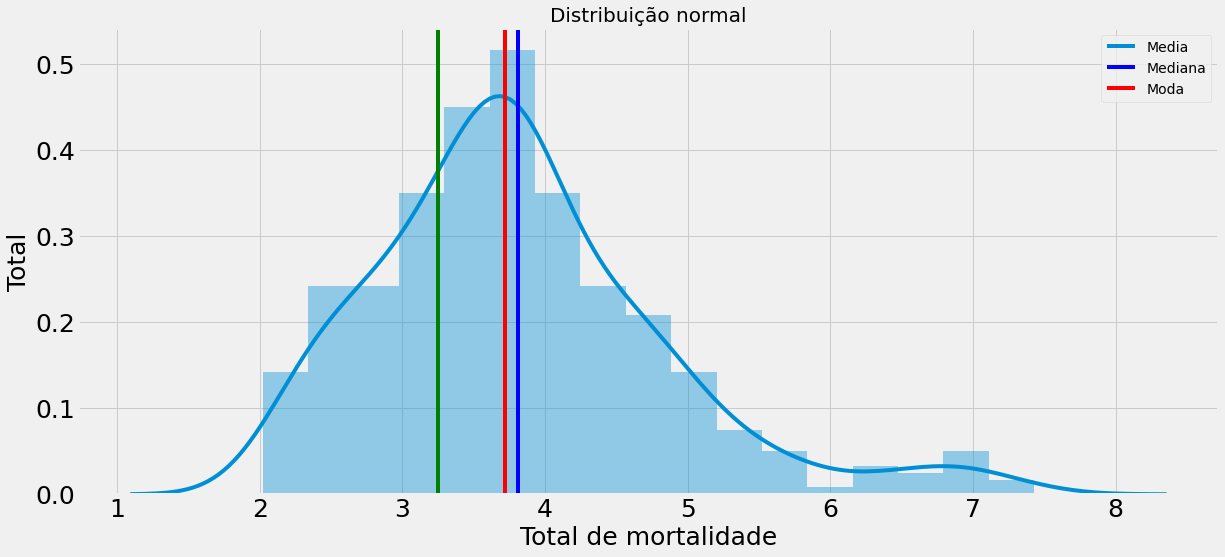

In [143]:
# Gr√°fico distribui√ß√£o normal
plt.figure(figsize=(18.2, 8))

ax = sns.distplot(data_1['Taxa_mortalidade']);
plt.title("Distribui√ß√£o normal", fontsize=20)
plt.xlabel("Total de mortalidade")
plt.ylabel("Total")
plt.axvline(data_1['Taxa_mortalidade'].mean(), color='b')
plt.axvline(data_1['Taxa_mortalidade'].median(), color='r')
plt.axvline(data_1['Taxa_mortalidade'].mode()[0], color='g');
plt.legend(["Media", "Mediana", "Moda"])
plt.show()

Text(0, 0.5, 'Valor total')

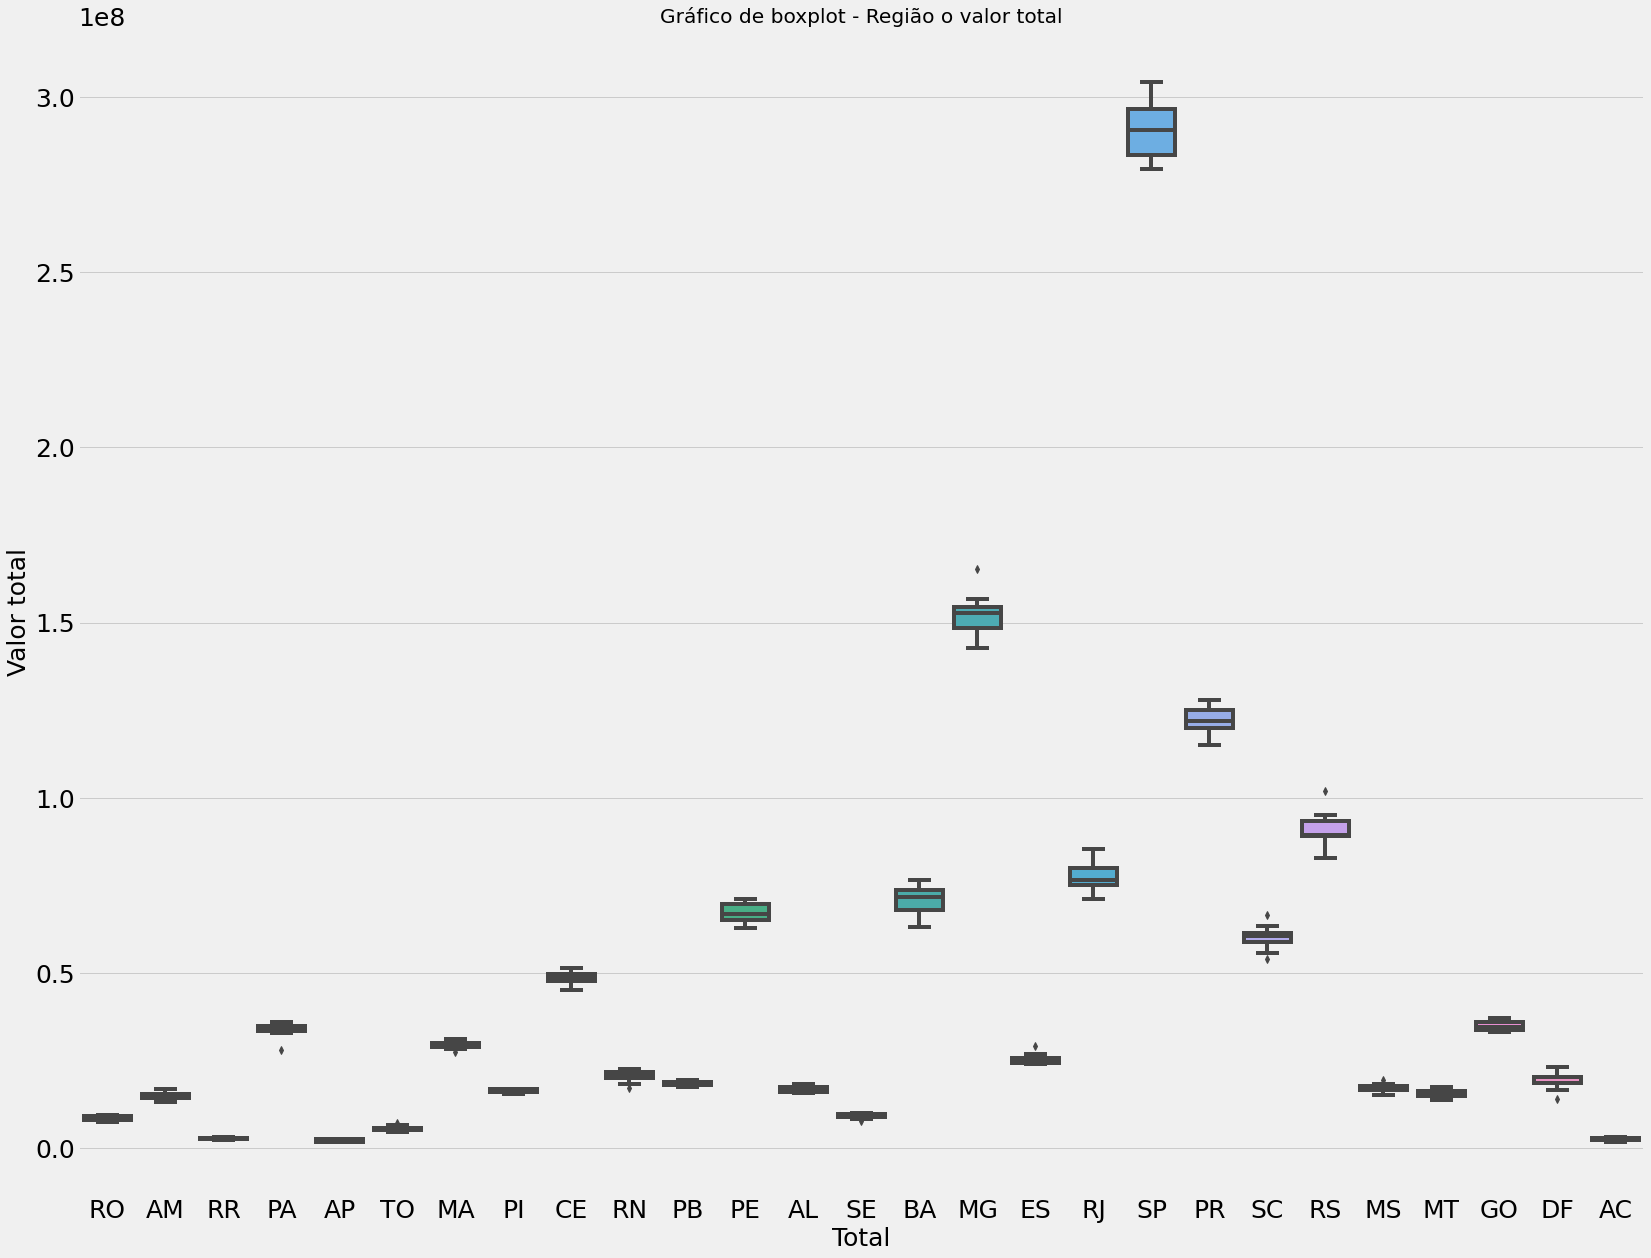

In [144]:
# Verificando os dados no boxplot regi√£o valor total verificando poss√≠veis outliers

ax = sns.boxplot(x="Regi√£o", y="Valor_total", data = data_1)
plt.title("Gr√°fico de boxplot - Regi√£o o valor total")
plt.xlabel("Total")
plt.ylabel("Valor total")

In [145]:
# C√°lculo da m√©dia de interna√ß√µes e √≥bitos

media_interna√ß√µes = data_1[['data', 'Interna√ß√µes']].groupby('data').mean()
media_obitos = data_1[["data", "√ìbitos"]].groupby('data').mean()

print("M√©dia de m√©dia interna√ß√µes", media_interna√ß√µes)
print()
print("M√©dia de m√©dia √≥bitos", media_obitos)

M√©dia de m√©dia interna√ß√µes              Interna√ß√µes
data                    
2017-12-01  34800.037037
2018-03-01  36823.037037
2018-04-01  37269.296296
2018-05-01  37718.703704
2018-07-01  37556.148148
2018-08-01  37785.925926
2018-09-01  36627.074074
2018-11-01  35867.518519
2018-12-01  34550.481481
2019-01-01  36314.666667
2019-02-01  35081.555556
2019-04-01  37520.925926
2019-06-01  37237.629630
2019-07-01  39158.653846

M√©dia de m√©dia √≥bitos                  √ìbitos
data                   
2017-12-01  1440.037037
2018-03-01  1499.629630
2018-04-01  1522.629630
2018-05-01  1574.370370
2018-07-01  1688.703704
2018-08-01  1650.000000
2018-09-01  1582.222222
2018-11-01  1484.370370
2018-12-01  1454.851852
2019-01-01  1635.148148
2019-02-01  1462.814815
2019-04-01  1548.370370
2019-06-01  1647.296296
2019-07-01  1804.769231


[Text(0.5, 1.0, 'M√©dia m√≥vel - √ìbitos'),
 Text(0.5, 0, 'Anos'),
 Text(0, 0.5, 'Total de √≥bitos')]

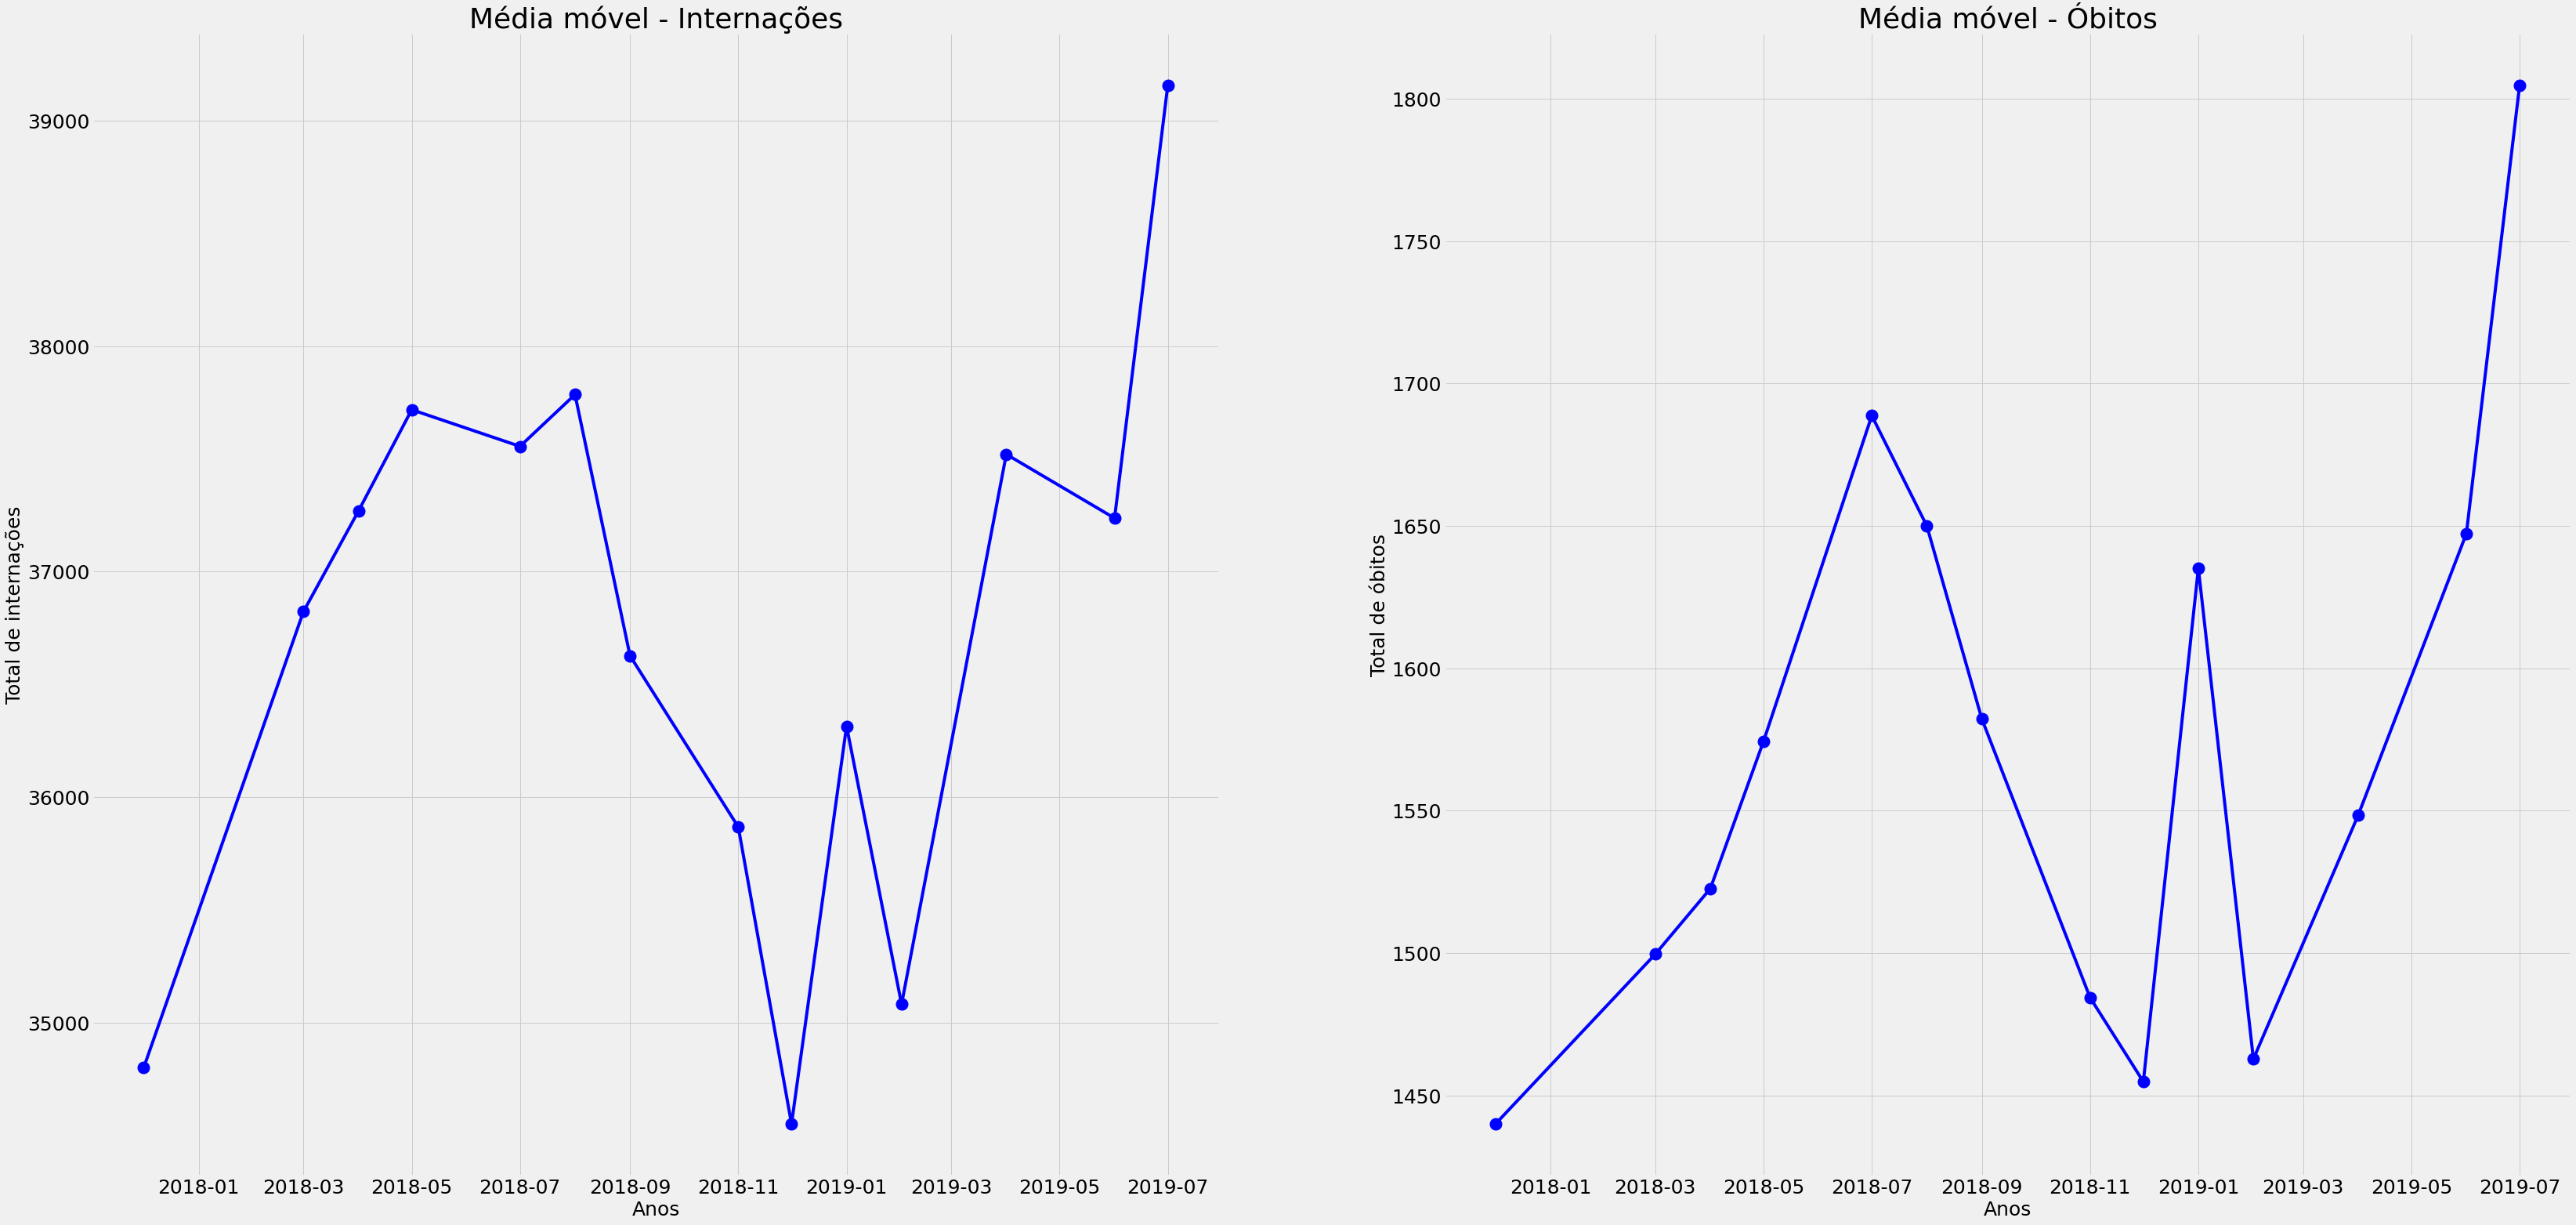

In [146]:
# Verifica√ß√£o m√©dia m√≥vel de interna√ß√µes e √≥bitos

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(50.5, 25));
plt.rcParams['font.size'] = '25'

ax1.plot(media_interna√ß√µes, marker='o', color = 'blue', markersize = 15);
ax1.set(title="M√©dia m√≥vel - Interna√ß√µes", xlabel = "Anos", ylabel = "Total de interna√ß√µes")
ax2.plot(media_obitos, marker='o', color = 'blue', markersize = 15);
ax2.set(title="M√©dia m√≥vel - √ìbitos", xlabel="Anos", ylabel="Total de √≥bitos")

# 6.2) Matriz de correla√ß√£o dos dados

In [147]:
# Matriz correla√ß√£o de pares de colunas, excluindo NA / valores nulos.

corr = data_1.corr()
corr

Interna√ß√µes  AIH_aprovadas  Valor_total  Valor_servi√ßos_hospitalares  Valor_servi√ßos_profissionais  Valor_m√©dio_AIH  Valor_m√©dio_intern  Dias_perman√™ncia  M√©dia_perman√™ncia    √ìbitos  Taxa_mortalidade
Interna√ß√µes                      1.000000       0.999923     0.989100                     0.987972                      0.991037         0.483613            0.494979          0.988890           0.102766  0.978980          0.401200
AIH_aprovadas                    0.999923       1.000000     0.989185                     0.988035                      0.991175         0.481727            0.493456          0.989774           0.107036  0.980215          0.403680
Valor_total                      0.989100       0.989185     1.000000                     0.999926                      0.998924         0.563165            0.573564          0.979871           0.127048  0.978965          0.445848
Valor_servi√ßos_hospitalares      0.987972       0.988035     0.999926                     1.000000                      0.998399         0.566027            0.576296          0.979273           0.130085  0.978887          0.448936
Valor_servi√ßos_profissionais     0.991037       0.991175     0.998924                     0.998399                      1.000000         0.557482            0.568247          0.979179           0.113203  0.975940          0.432267
Valor_m√©dio_AIH                  0.483613       0.481727     0.563165                     0.566027                      0.557482         1.000000            0.999104          0.482321           0.229847  0.498323          0.607948
Valor_m√©dio_intern               0.494979       0.493456     0.573564                     0.576296                      0.568247         0.999104            1.000000          0.495777           0.241326  0.511975          0.620124
Dias_perman√™ncia                 0.988890       0.989774     0.979871                     0.979273                      0.979179         0.482321            0.495777          1.000000           0.229501  0.994256          0.484849
M√©dia_perman√™ncia                0.102766       0.107036     0.127048                     0.130085                      0.113203         0.229847            0.241326          0.229501           1.000000  0.247888          0.675840
√ìbitos                           0.978980       0.980215     0.978965                     0.978887                      0.975940         0.498323            0.511975          0.994256           0.247888  1.000000          0.532031
Taxa_mortalidade                 0.401200       0.403680     0.445848                     0.448936                      0.432267         0.607948            0.620124          0.484849           0.675840  0.532031          1.000000

Text(0.5, 1.0, 'Matriz de correla√ß√£o')

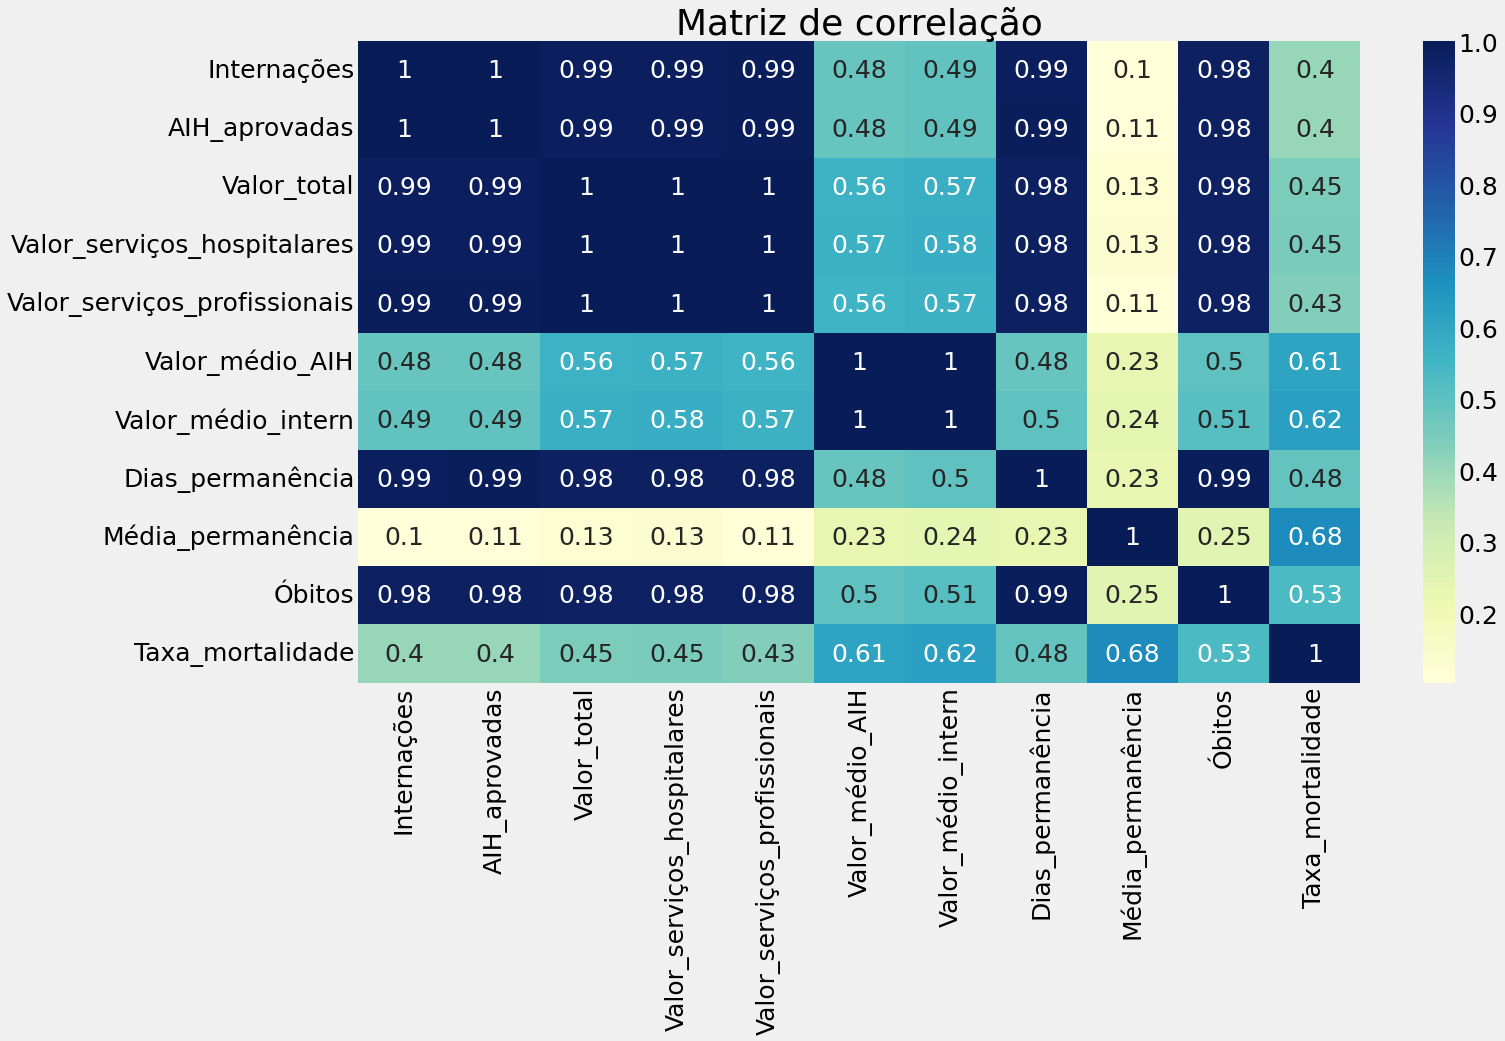

In [148]:
# Gr√°fico da matriz de correla√ß√£o

plt.figure(figsize=(20,11))
ax = sns.heatmap(data_1.corr(), annot=True, cmap='YlGnBu');
plt.title("Matriz de correla√ß√£o")

# 6.3) An√°lise de dados

- 2.1 - An√°lise 

In [149]:
# Verificando √≥bitos por ano com gr√°fico interativo 
fig = px.bar(data_1, x='ano', y='√ìbitos', title='√ìbitos por ano')
fig.show()

Text(0, 0.5, 'Total')

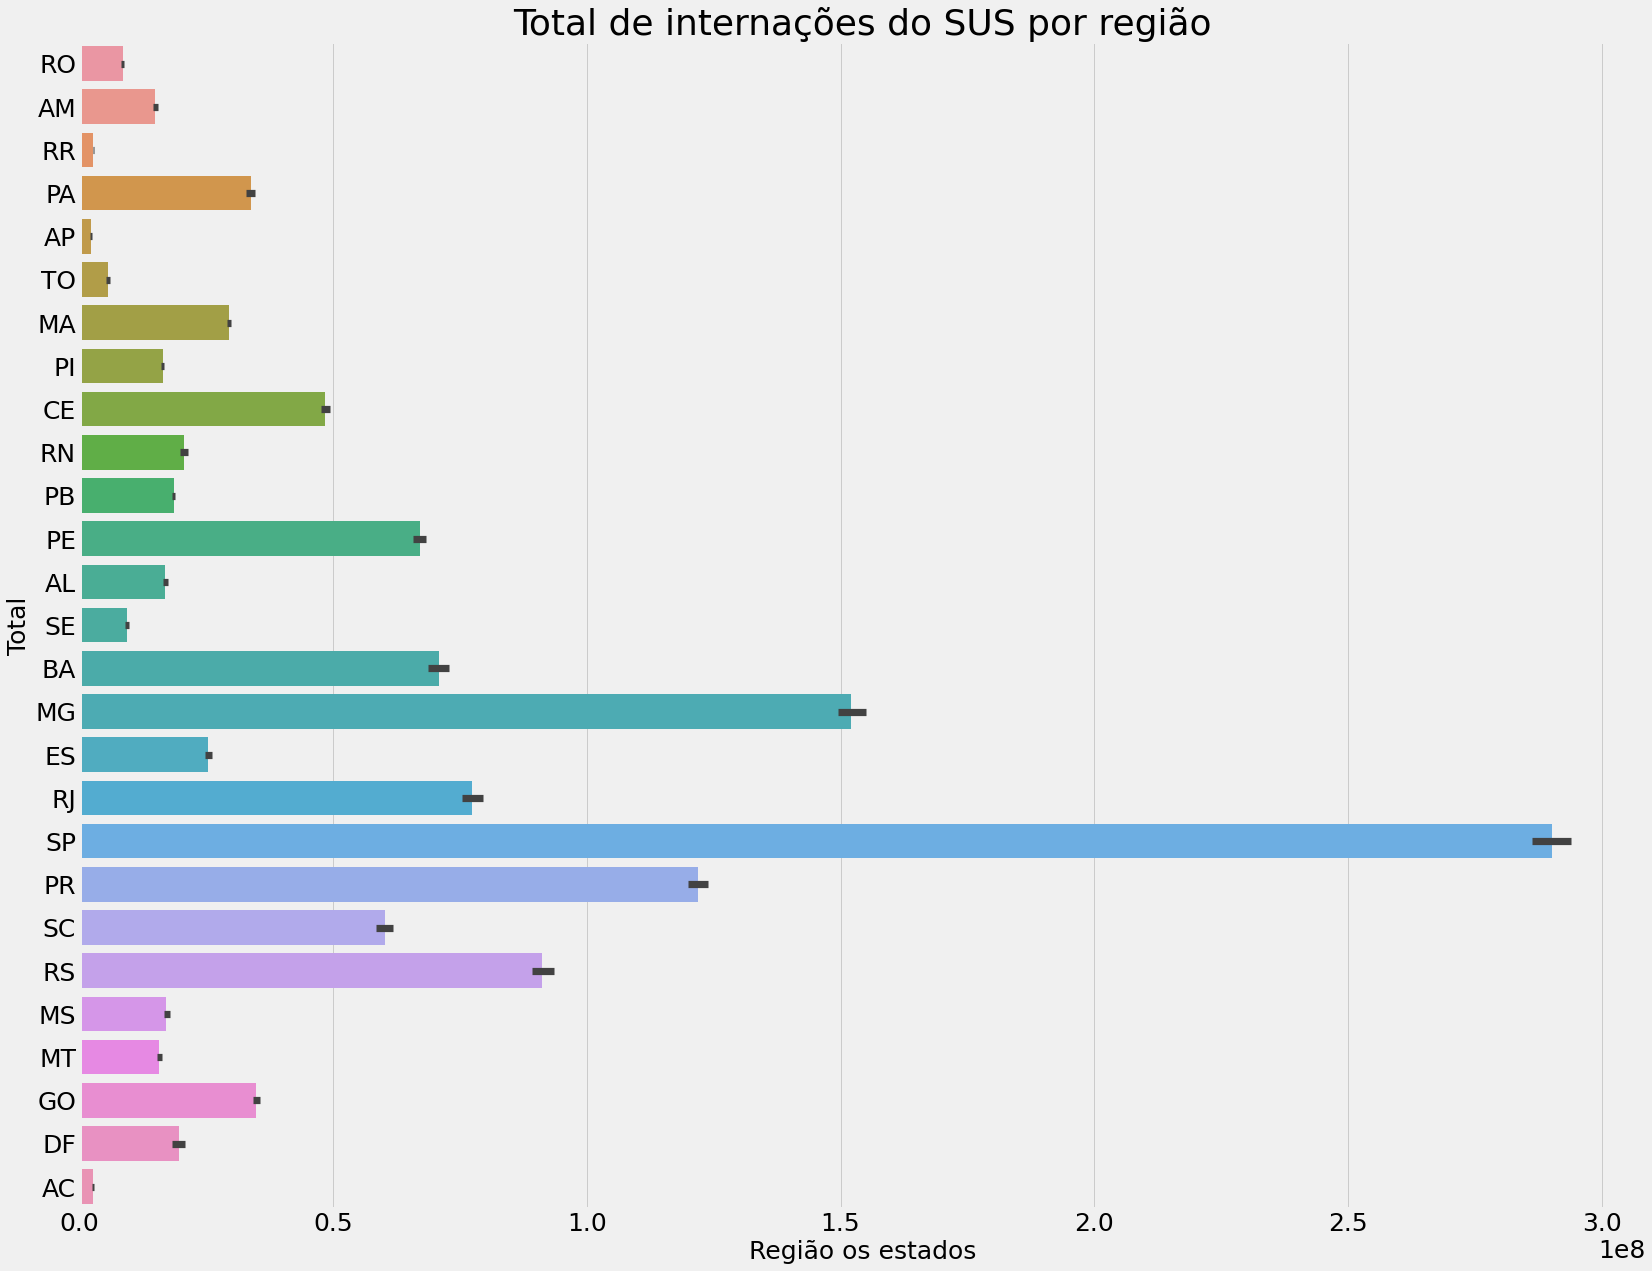

In [150]:
# Observando total de interna√ß√µes

sns.barplot(x='Valor_total', y='Regi√£o', data=data_1)
plt.title("Total de interna√ß√µes do SUS por regi√£o")
plt.xlabel("Regi√£o os estados")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

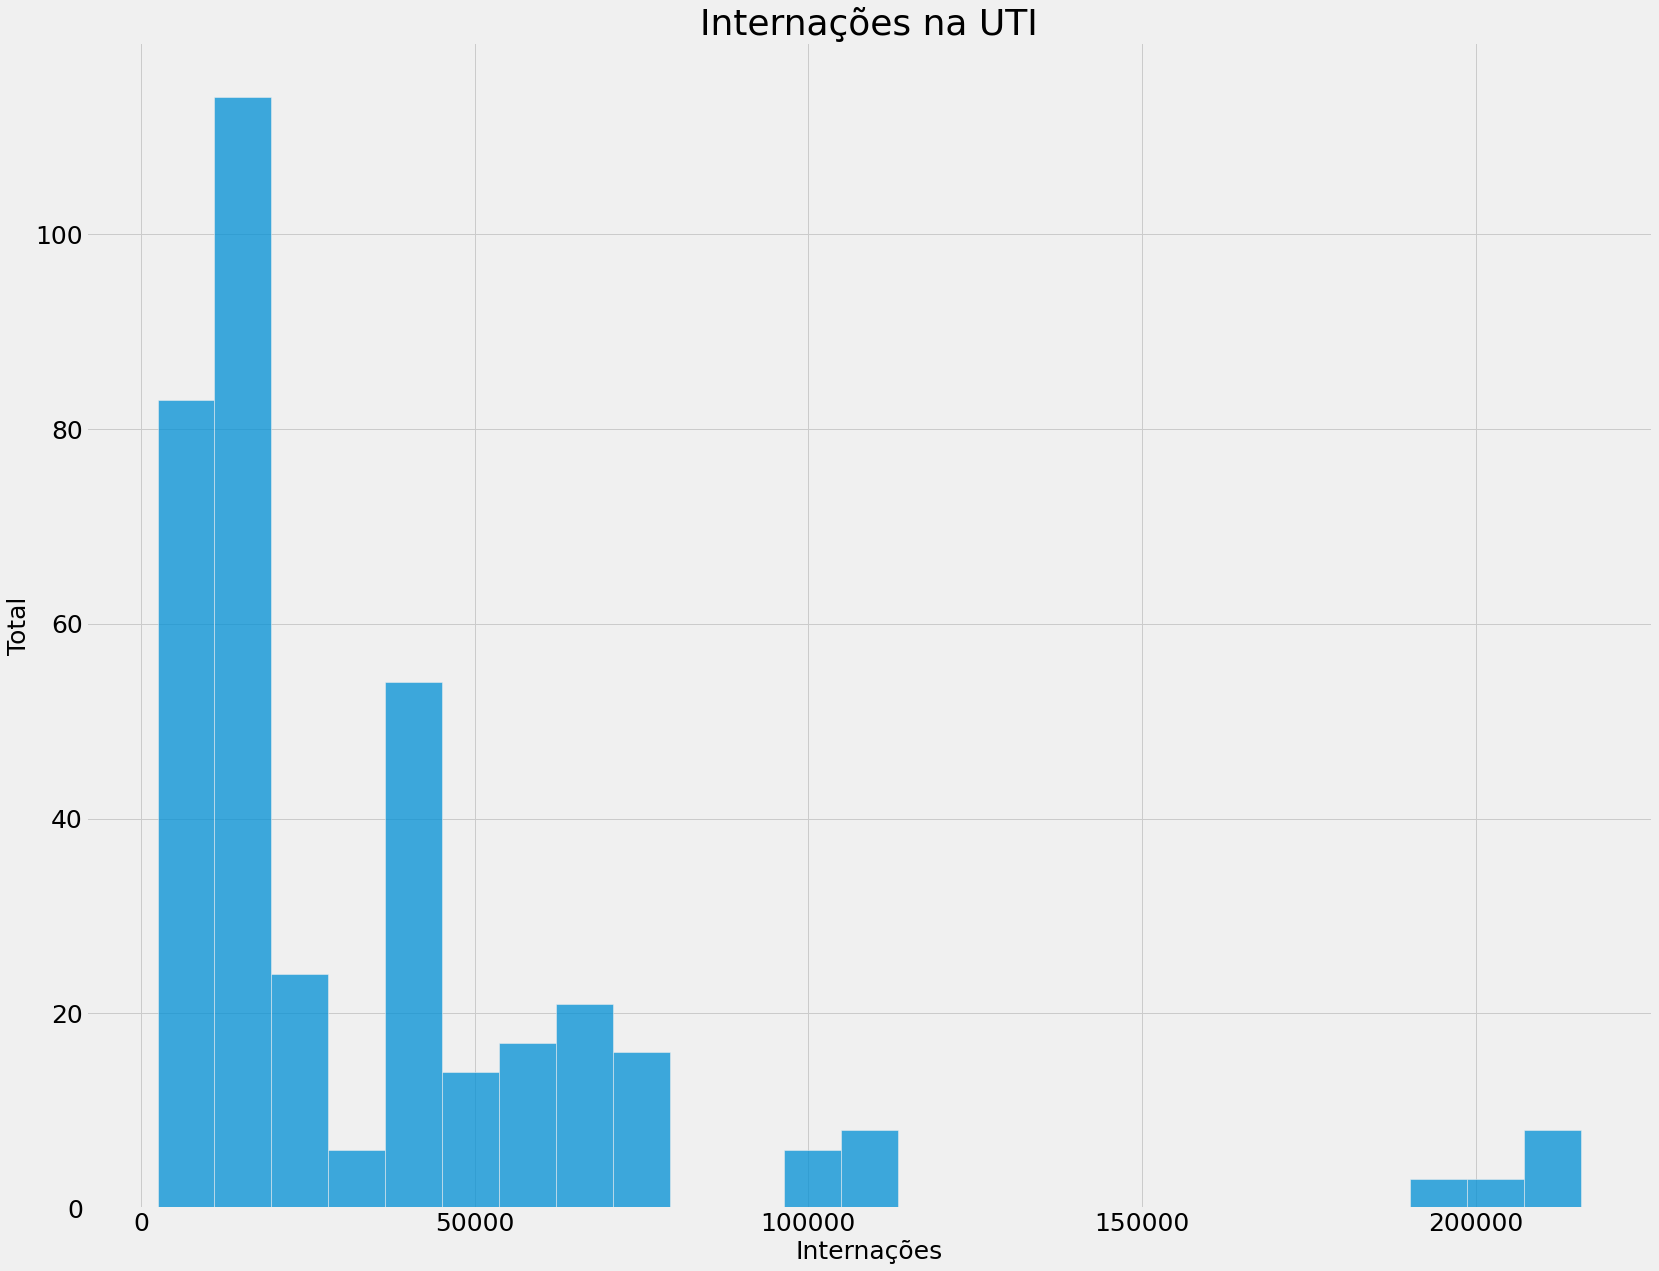

In [151]:
# Observando total de interna√ß√µes

sns.histplot(data_1["Interna√ß√µes"])
plt.title("Interna√ß√µes na UTI")
plt.xlabel("Interna√ß√µes")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

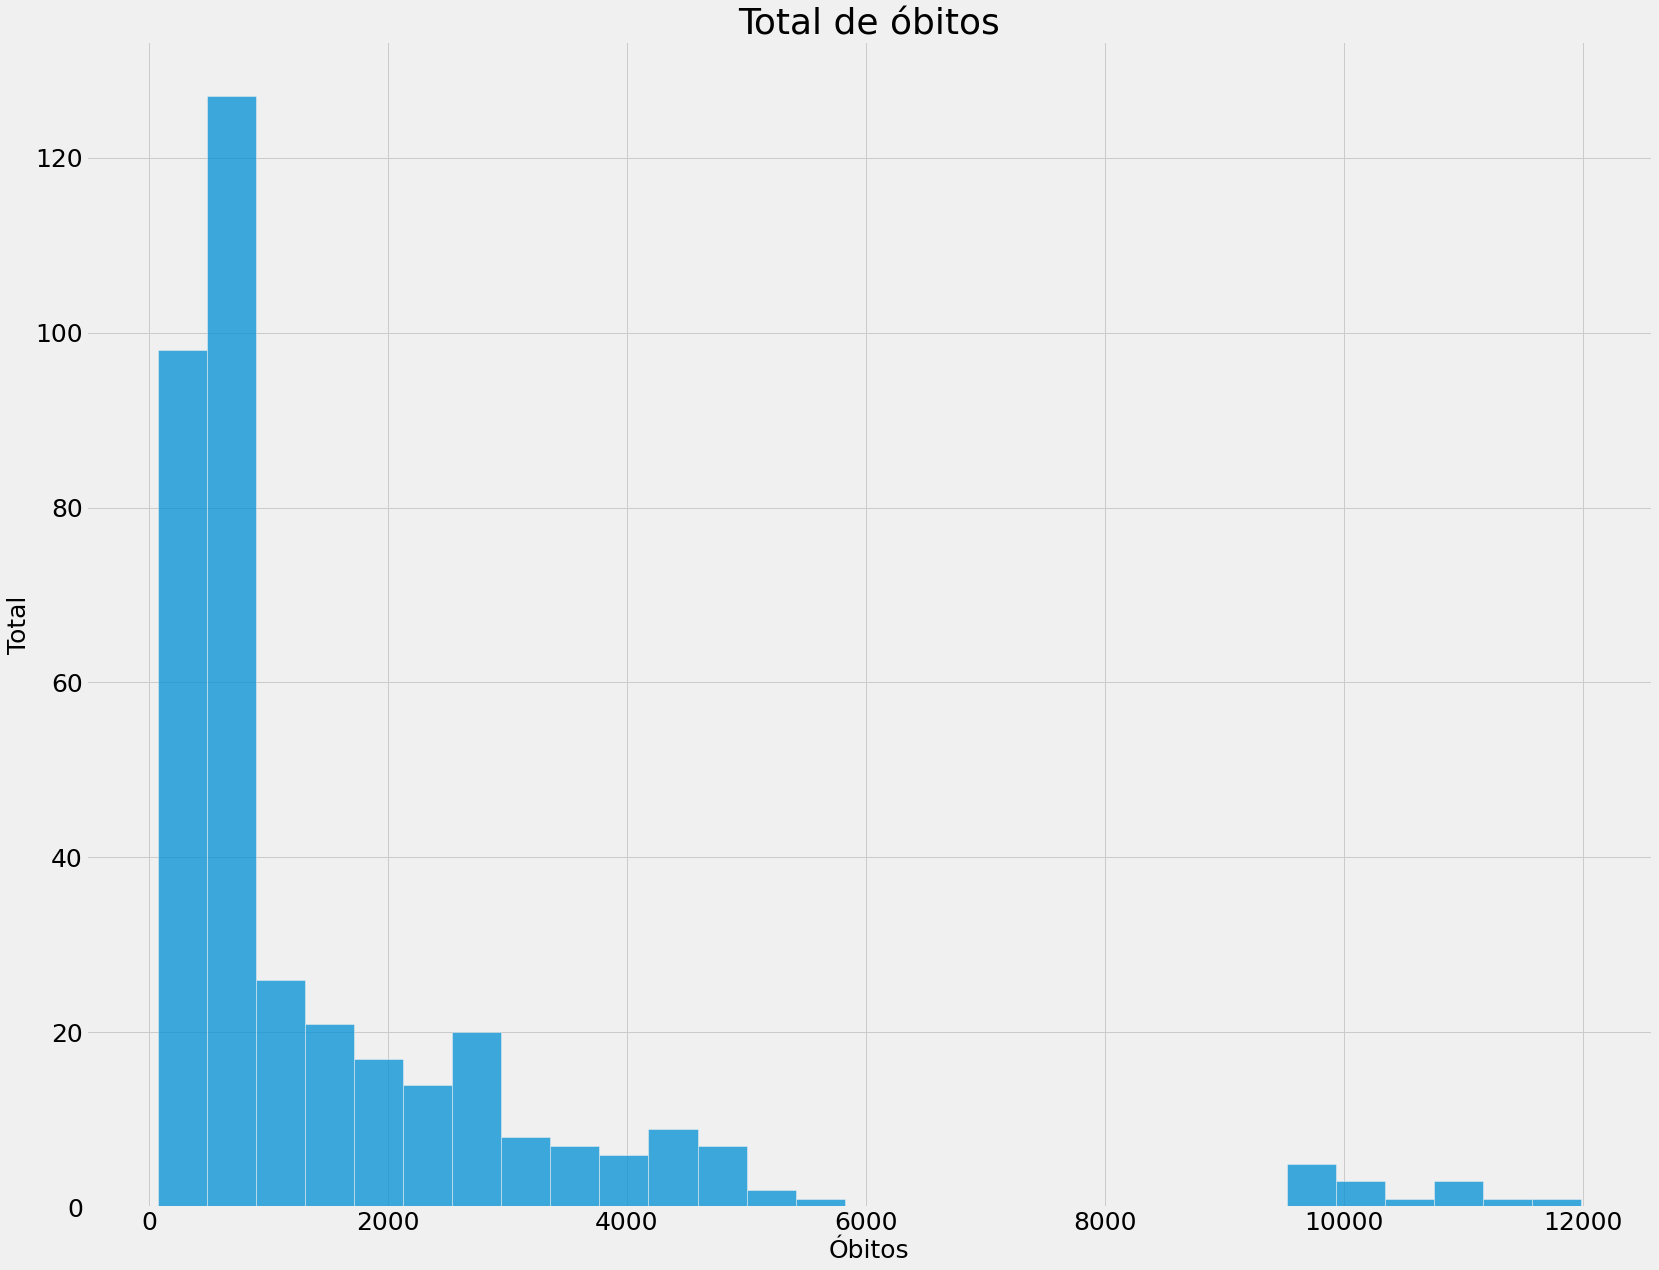

In [152]:
# Observando total de √≥bitos

sns.histplot(data_1["√ìbitos"])
plt.title("Total de √≥bitos")
plt.xlabel("√ìbitos")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

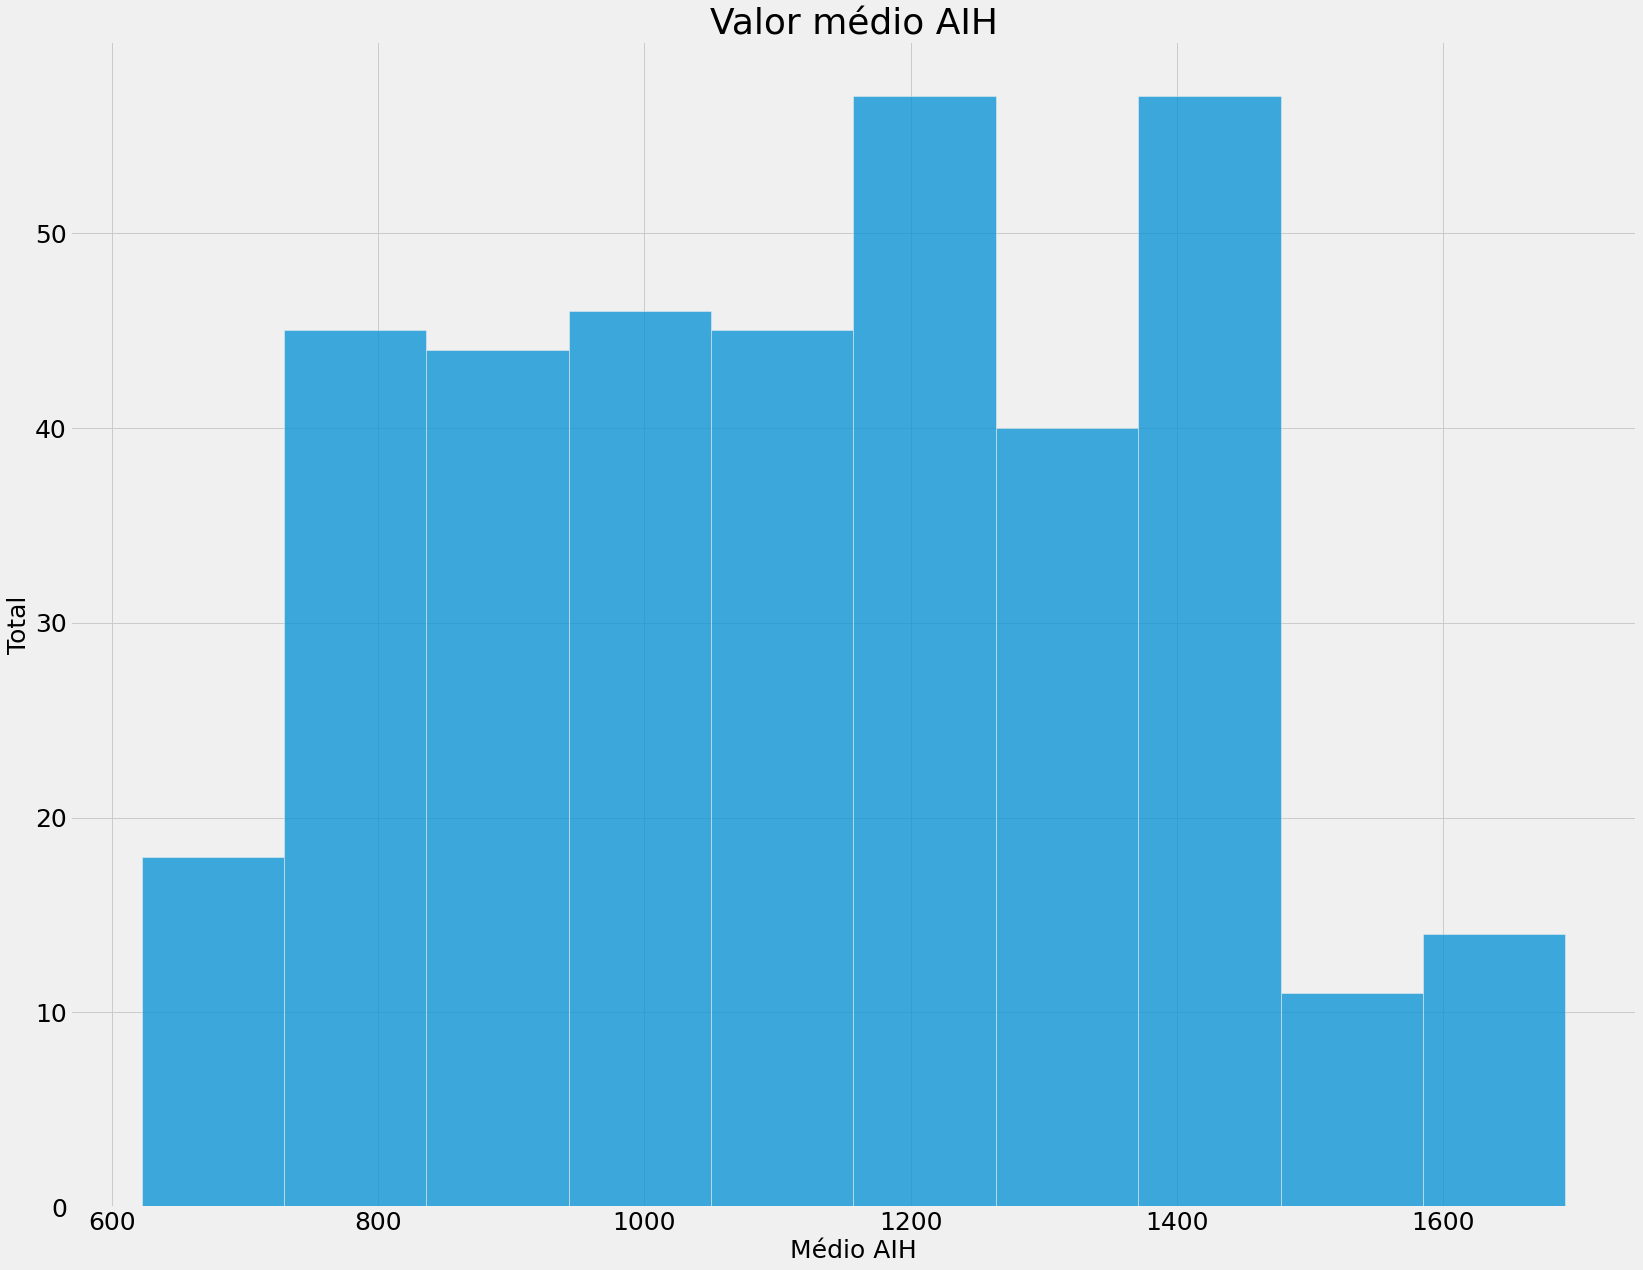

In [153]:
# Observando m√©dia do valor do AIH

sns.histplot(data_1["Valor_m√©dio_AIH"])
plt.title("Valor m√©dio AIH")
plt.xlabel("M√©dio AIH")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

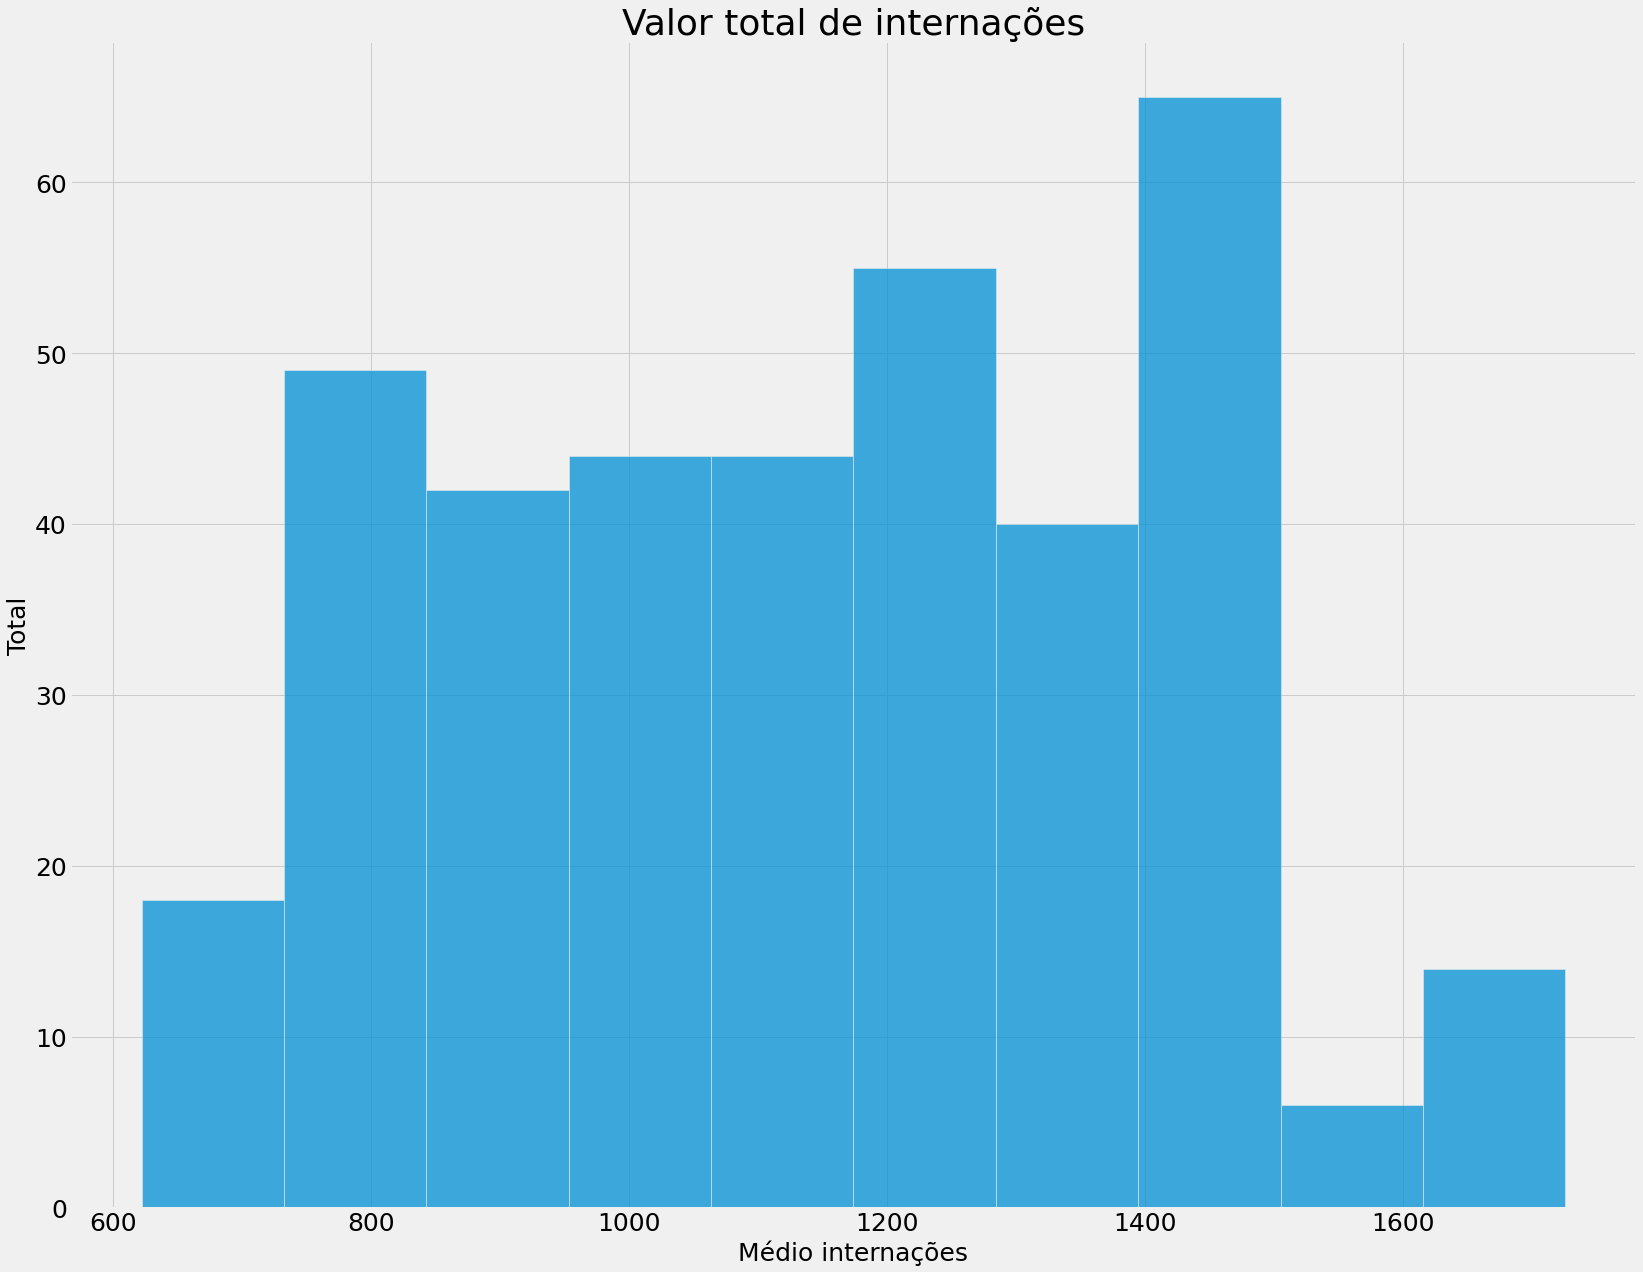

In [154]:
# Observando m√©dia de interna√ß√µes

sns.histplot(data_1["Valor_m√©dio_intern"])
plt.title("Valor total de interna√ß√µes")
plt.xlabel("M√©dio interna√ß√µes")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

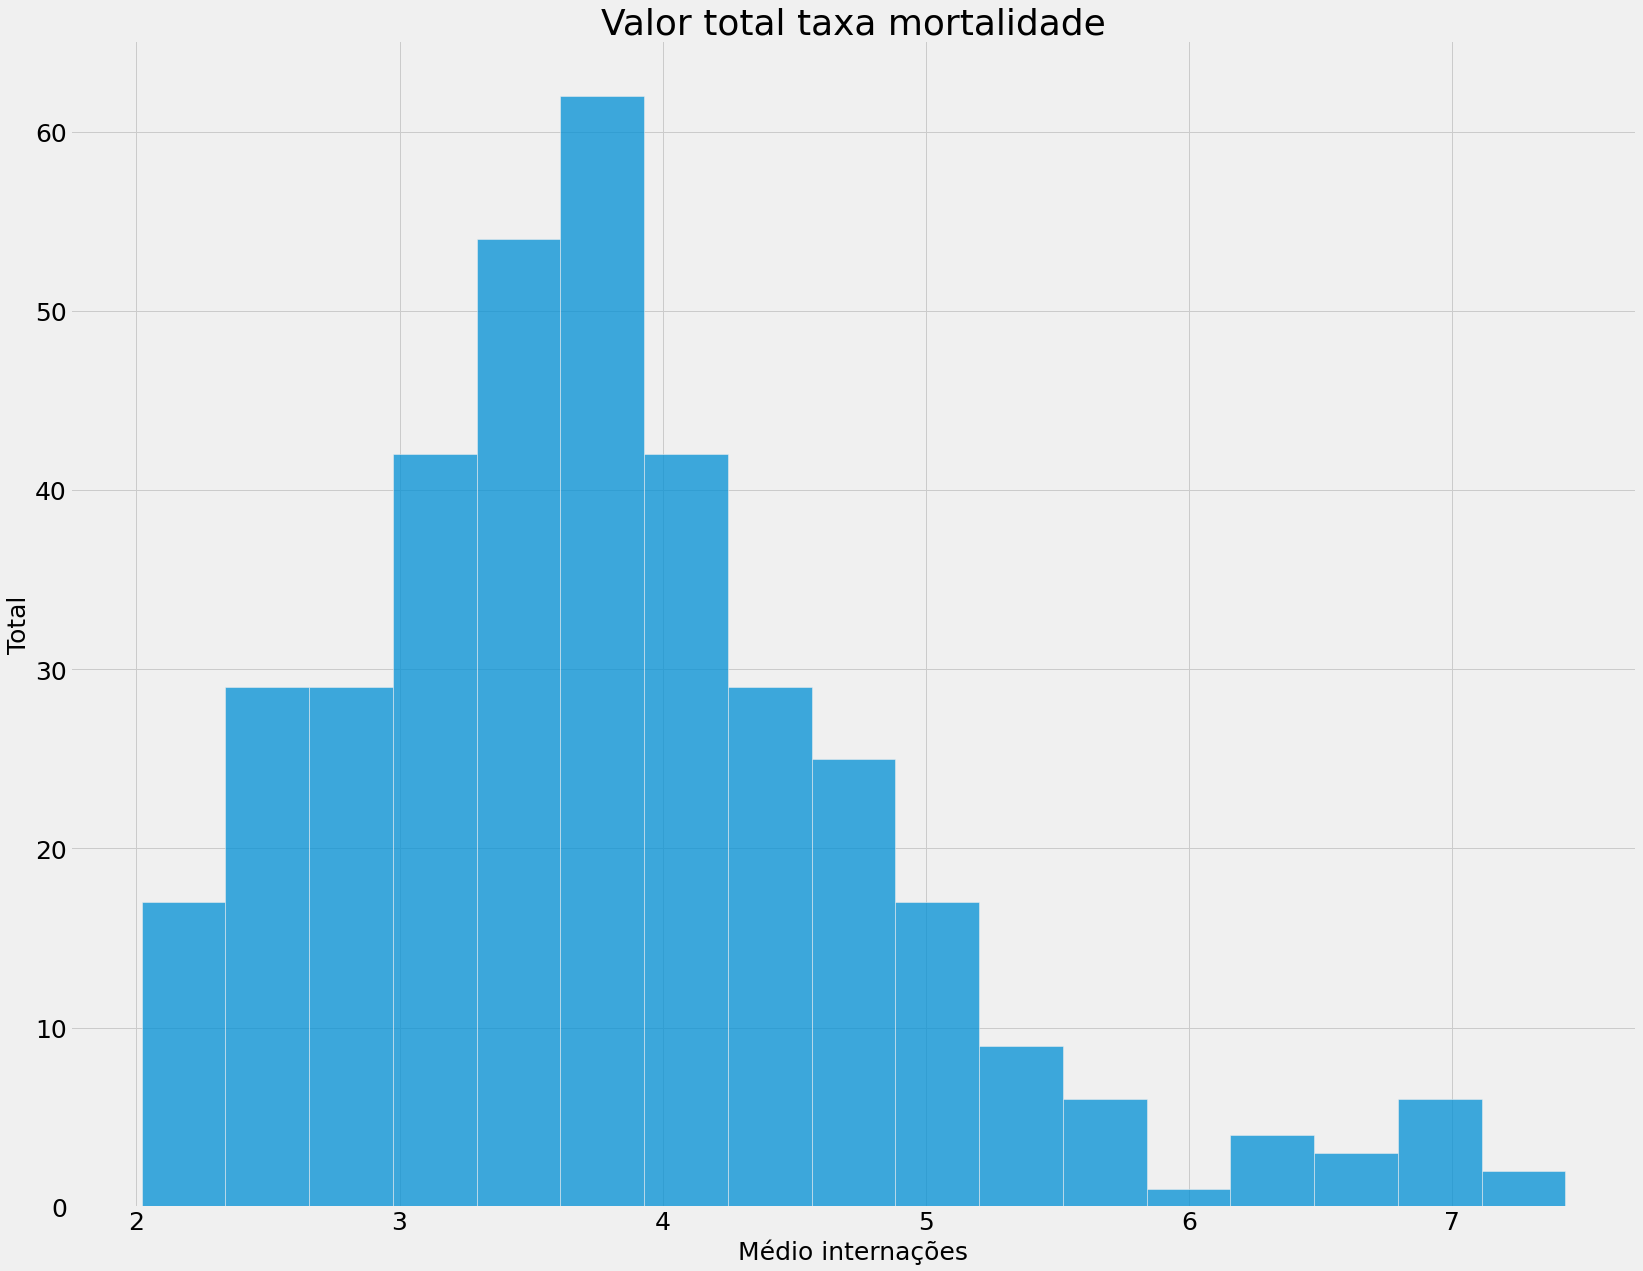

In [155]:
# Observando total da taxa de mortalidade

sns.histplot(data_1["Taxa_mortalidade"])
plt.title("Valor total taxa mortalidade")
plt.xlabel("M√©dio interna√ß√µes")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

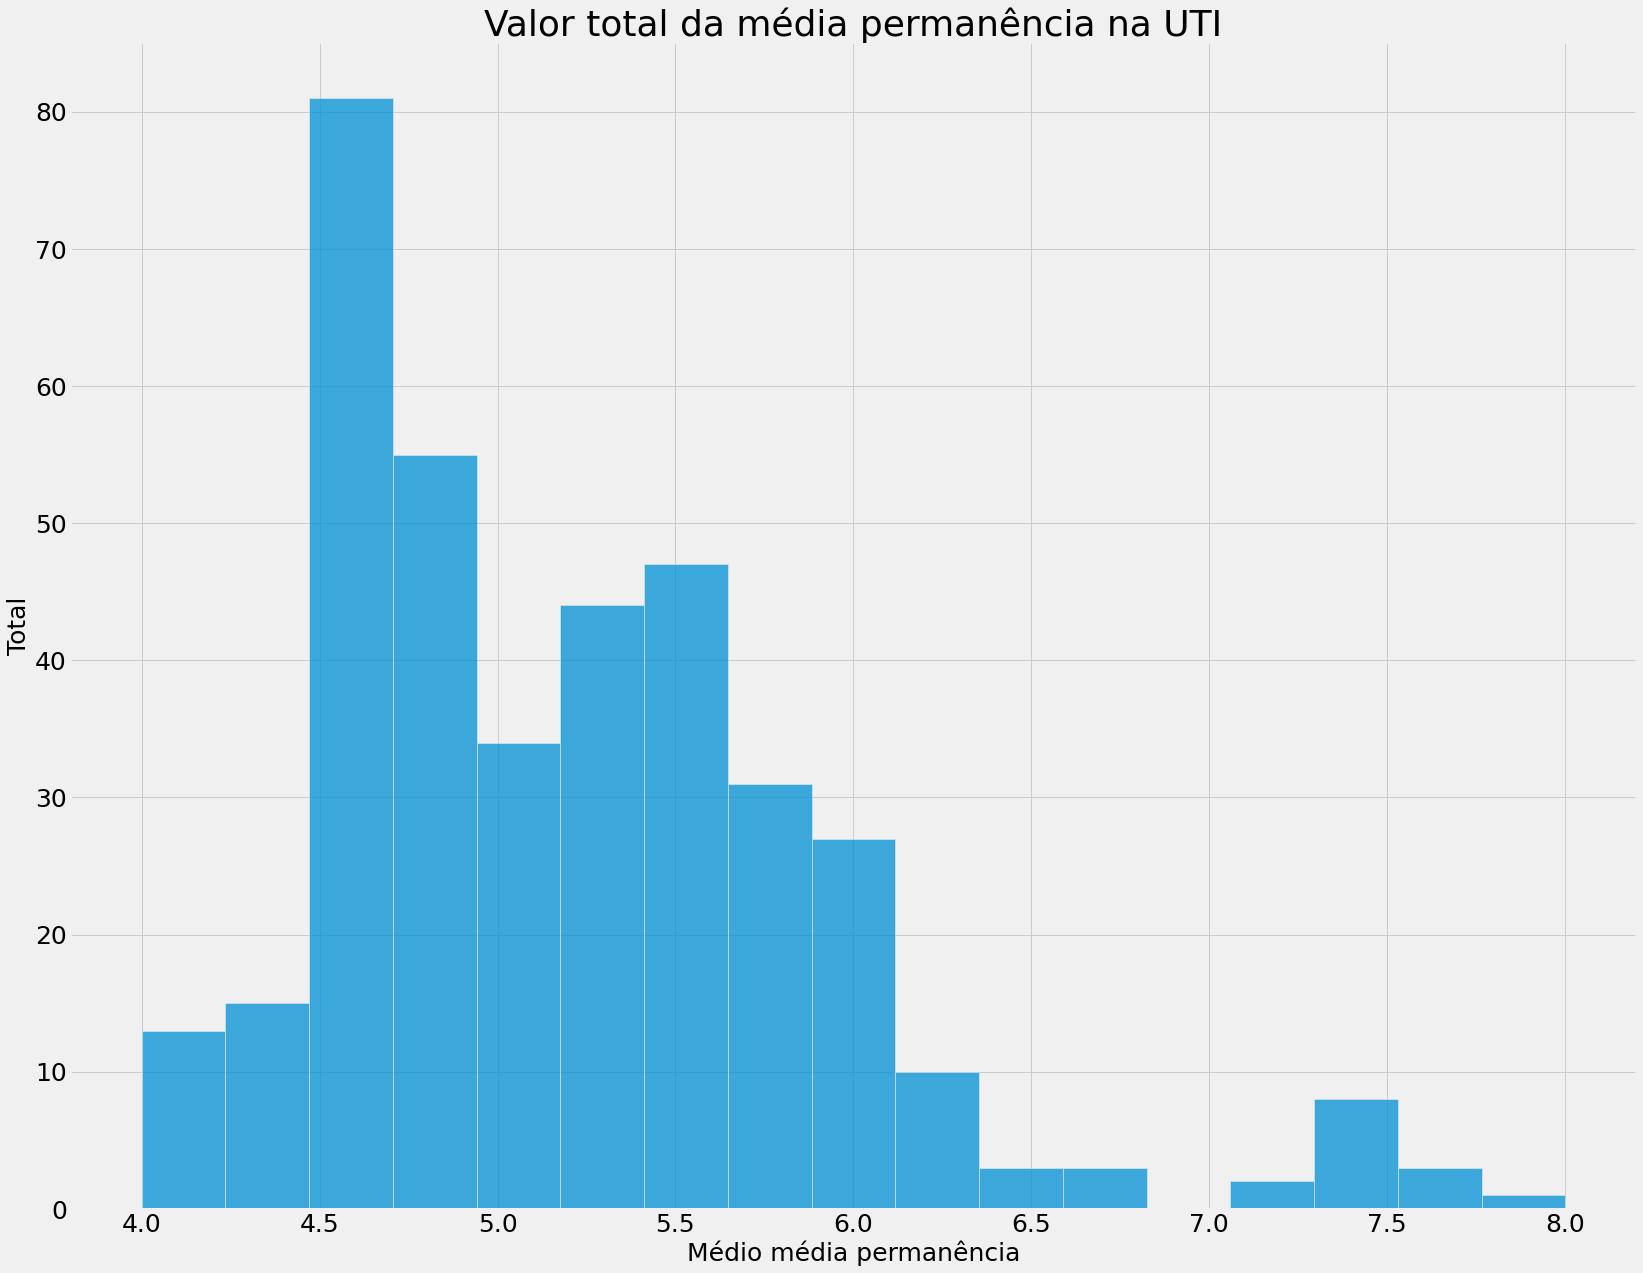

In [156]:
# Comparando perman√™ncia m√©dia da UTI

sns.histplot(data_1["M√©dia_perman√™ncia"])
plt.title("Valor total da m√©dia perman√™ncia na UTI")
plt.xlabel("M√©dio m√©dia perman√™ncia")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

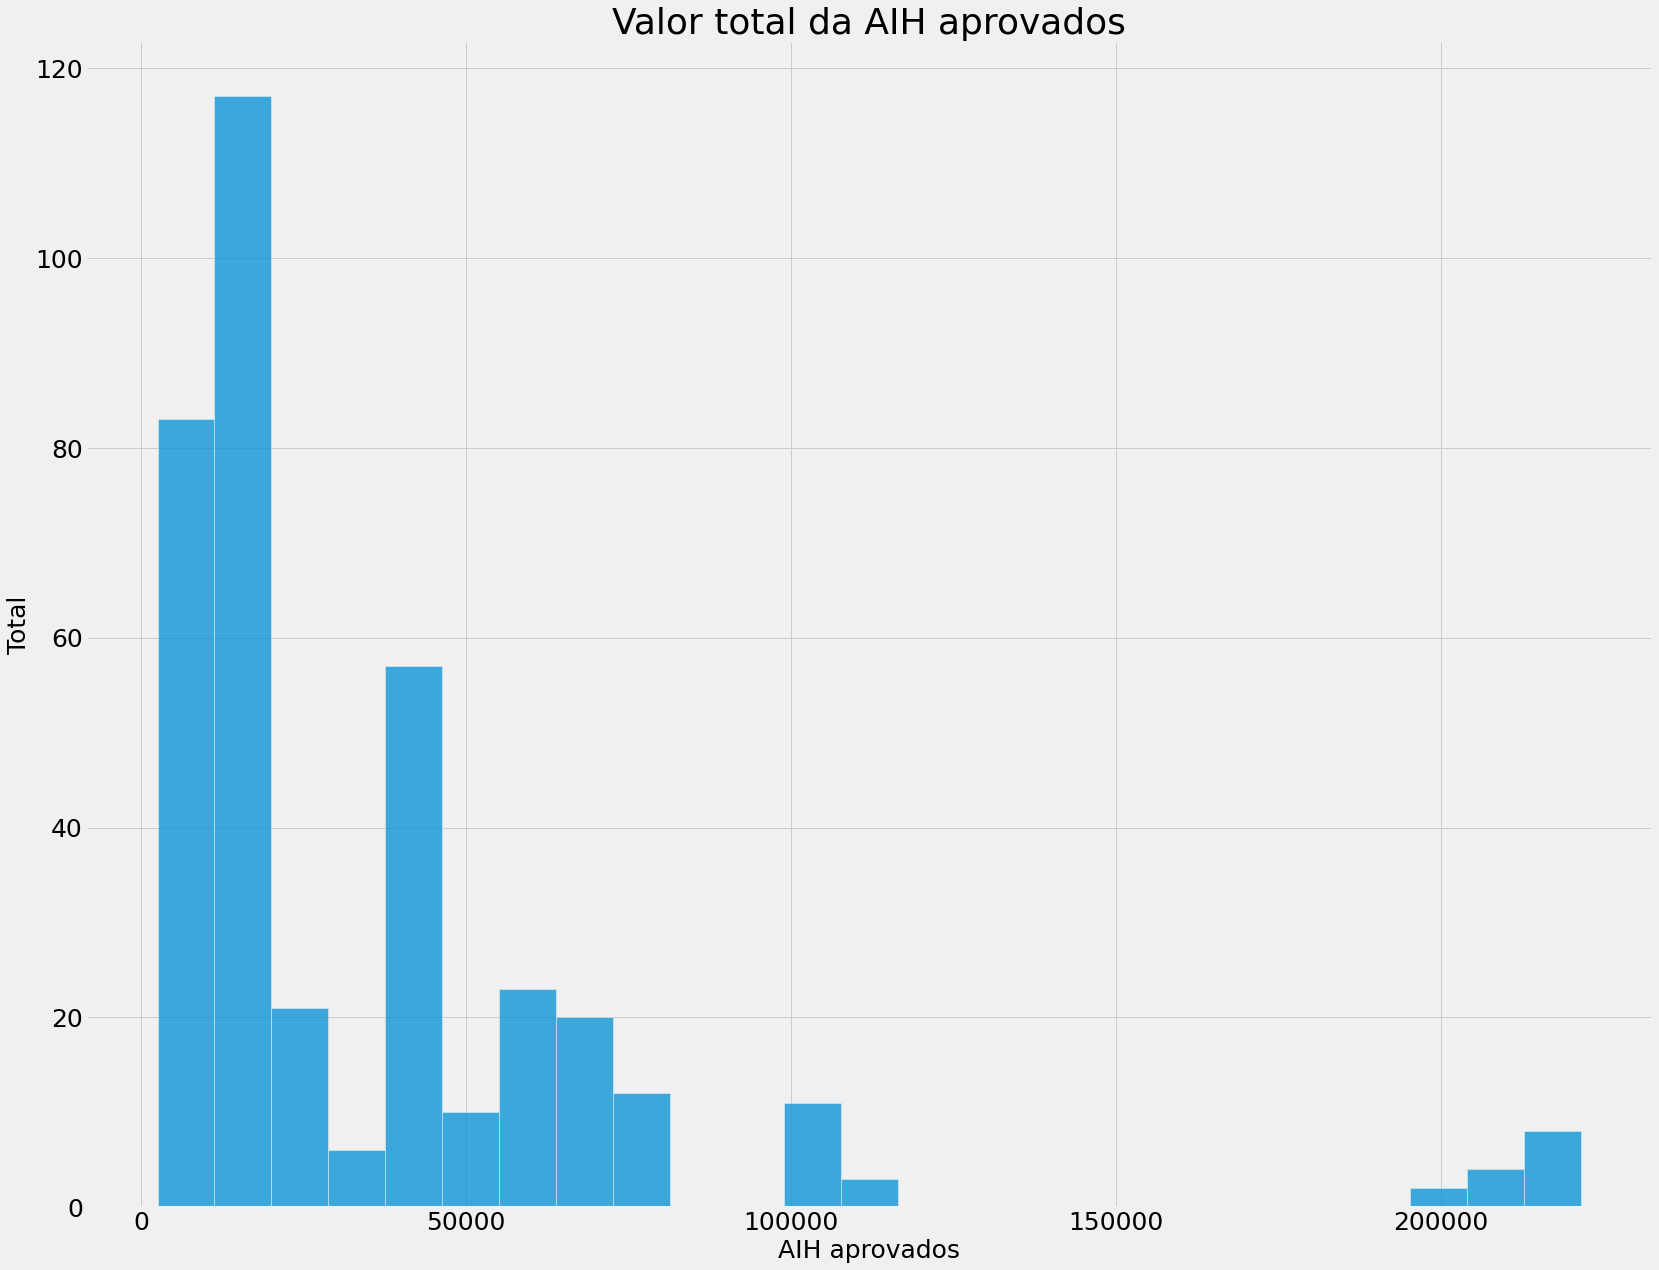

In [157]:
# Comparando o AIH de aprovados

sns.histplot(data_1["AIH_aprovadas"])
plt.title("Valor total da AIH aprovados")
plt.xlabel("AIH aprovados")
plt.ylabel("Total")

# 6.4) An√°lise de dados = Univariada

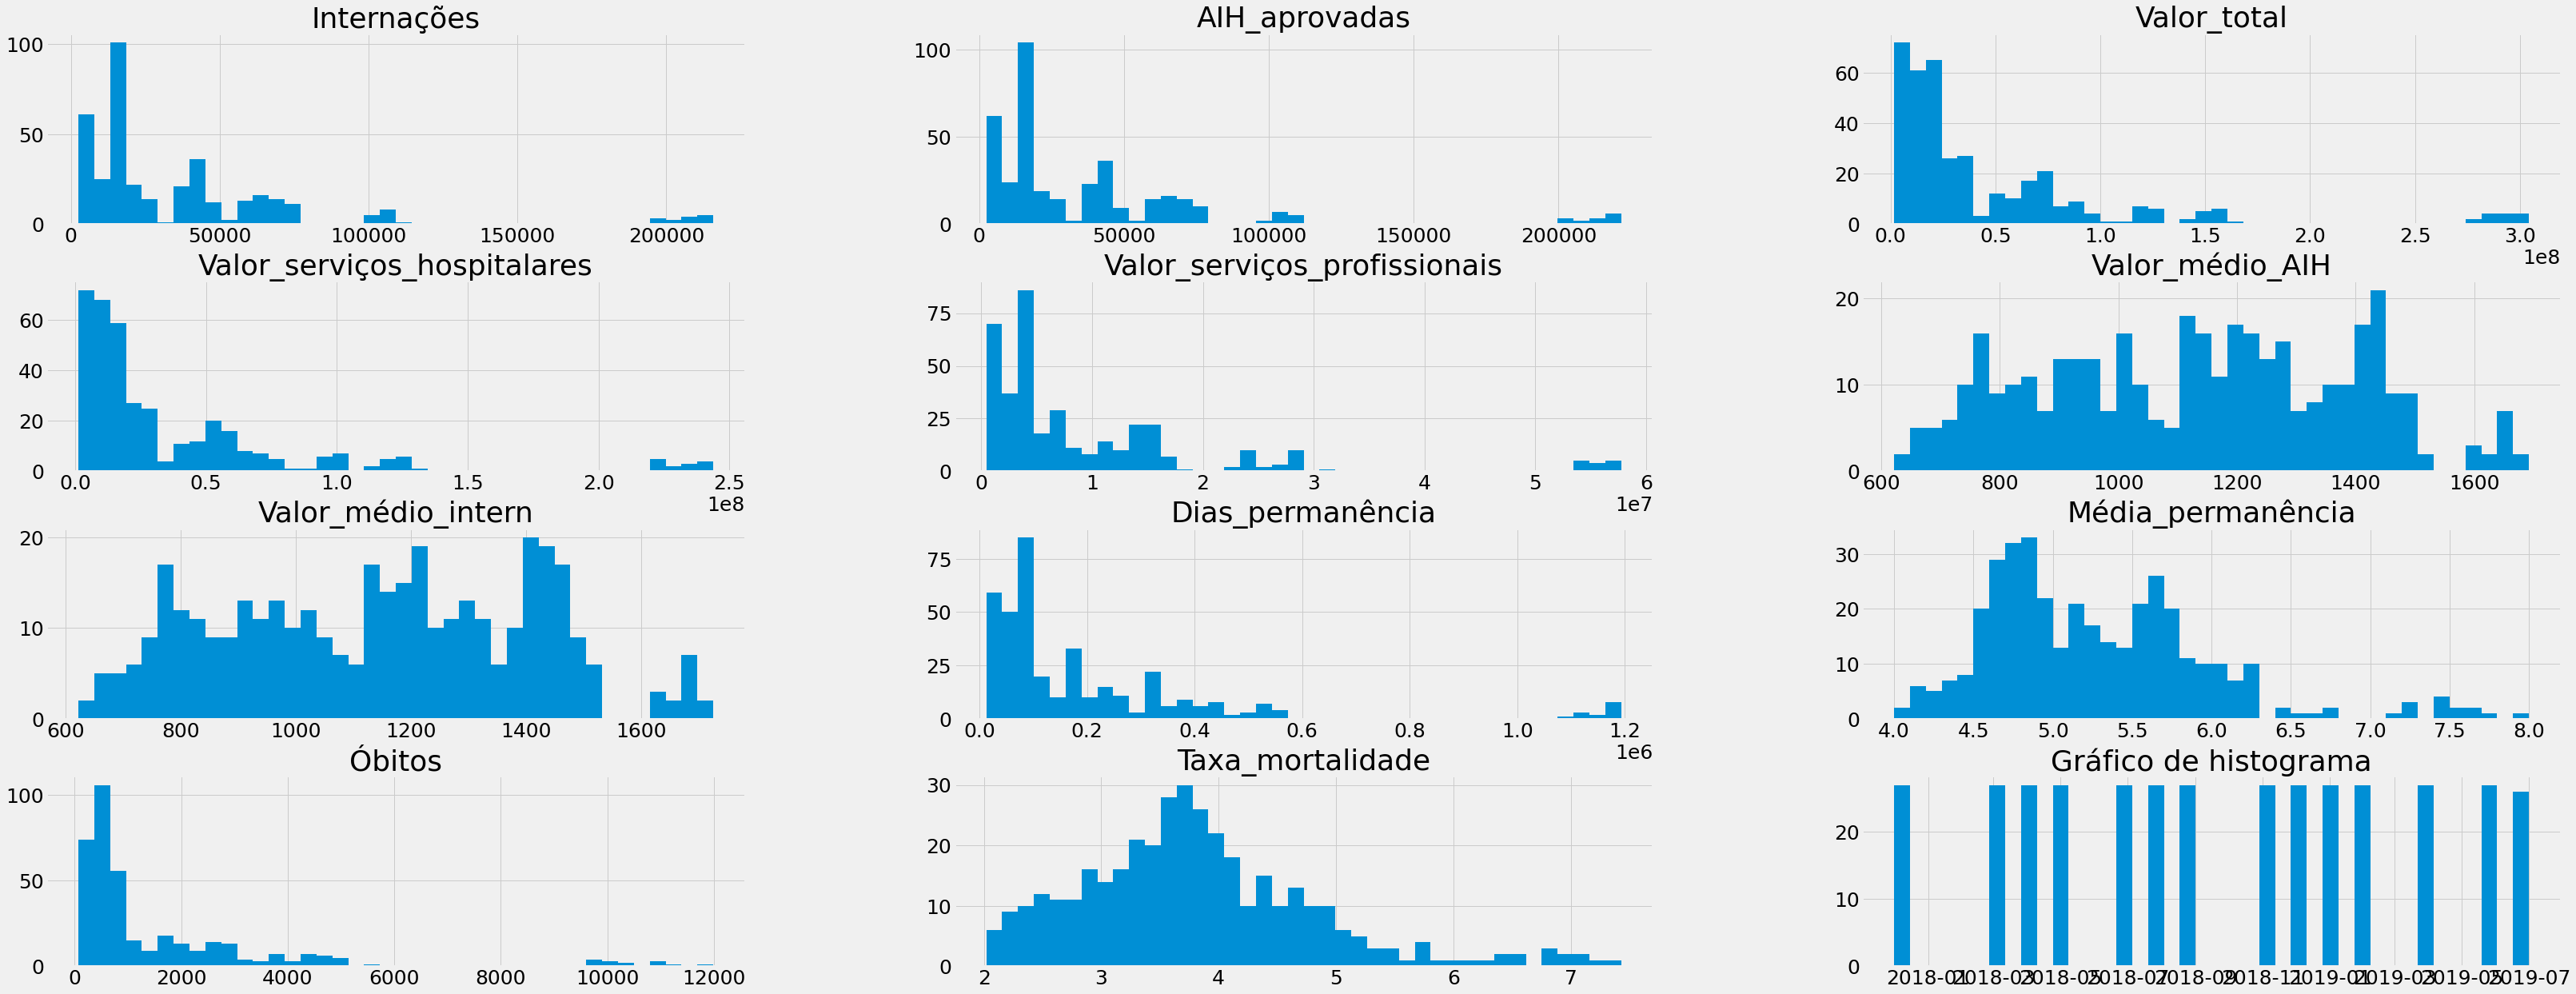

In [158]:
# Fazendo um comparativo dos dados 

data_1.hist(bins = 40, figsize=(50.2, 20))
plt.title("Gr√°fico de histograma")
plt.show()

# 6.5) Data Processing

**O processamento de dados come√ßa com os dados em sua forma bruta e os converte em um formato mais leg√≠vel (gr√°ficos, documentos, etc.), dando-lhes a forma e o contexto necess√°rios para serem interpretados por computadores e utilizados.**

- Exemplo: Uma letra, um valor num√©rico. Quando os dados s√£o vistos dentro de um contexto e transmite algum significado, tornam-se informa√ß√µes.

In [159]:
# Limpeza dos dados
data_1.drop(columns=["Regi√£o", "data"], inplace = True)
data_1.head()

Interna√ß√µes  AIH_aprovadas  Valor_total  Valor_servi√ßos_hospitalares  Valor_servi√ßos_profissionais  Valor_m√©dio_AIH  Valor_m√©dio_intern  Dias_perman√™ncia  M√©dia_perman√™ncia  √ìbitos  Taxa_mortalidade mes   ano
1       9603.0         9603.0   9404751.41                   7666945.90                    1737805.51           979.36              979.36           53043.0                5.5   315.0              3.28   7  2019
2      16248.0        16248.0  15624312.73                  12166634.07                    3455637.92           961.61              961.61           85512.0                5.3   536.0              3.30   7  2019
3       4324.0         4324.0   3137537.40                   2356231.68                     781305.72           725.61              725.61           25560.0                5.9   171.0              3.95   7  2019
4      34774.0        34774.0  28178633.44                  21241354.07                    6581738.70           810.34              810.34          138135.0                4.0   832.0              2.39   7  2019
5       3407.0         3407.0   2380727.69                   1776869.35                     603858.34           698.78              698.78           18703.0                5.5    85.0              2.49   7  2019

In [160]:
# Mundando os tipo de dados de object para inteiros 

data_1['√ìbitos'] = data_1['√ìbitos'].astype(int)
data_1['Taxa_mortalidade'] = data_1['Taxa_mortalidade'].astype(int)
data_1['Interna√ß√µes'] = data_1['Interna√ß√µes'].astype(int)
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 1 to 31
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Interna√ß√µes                   377 non-null    int32  
 1   AIH_aprovadas                 377 non-null    float64
 2   Valor_total                   377 non-null    float64
 3   Valor_servi√ßos_hospitalares   377 non-null    float64
 4   Valor_servi√ßos_profissionais  377 non-null    float64
 5   Valor_m√©dio_AIH               377 non-null    float64
 6   Valor_m√©dio_intern            377 non-null    float64
 7   Dias_perman√™ncia              377 non-null    float64
 8   M√©dia_perman√™ncia             377 non-null    float64
 9   √ìbitos                        377 non-null    int32  
 10  Taxa_mortalidade              377 non-null    int32  
 11  mes                           377 non-null    object 
 12  ano                           377 non-null    object 
d

# 6.6) Feature Engineering

- Praticamente todos os algoritmos de Aprendizado de M√°quina possuem entradas e sa√≠das. As entradas s√£o formadas por colunas de dados estruturados, onde cada coluna recebe o nome de feature, tamb√©m conhecido como vari√°veis independentes ou atributos. Essas features podem ser palavras, peda√ßos de informa√ß√£o de uma imagem, etc. Os modelos de aprendizado de m√°quina utilizam esses recursos para classificar as informa√ß√µes. 

**Por exemplo, sedentarismo e fator heredit√°rio s√£o vari√°veis independentes para quando se quer prever se algu√©m vai ter c√¢ncer ou n√£o**  

- As sa√≠das, por sua vez, s√£o chamadas de vari√°veis dependentes ou classe, e essa √© a vari√°vel que estamos tentando prever. O nosso resultado pode ser 0 e 1 correspondendo a 'N√£o' e 'Sim' respectivamente, que responde a uma pergunta como: "Fulano √© bom pagador?" ou a probabilidade de algu√©m comprar um produto ou n√£o.

In [161]:
# Importando a biblioteca para pr√©-processamento 

from sklearn.preprocessing import LabelEncoder

for i in data_1.columns:
    if data_1[i].dtype==np.number:
        continue
    data_1[i]= LabelEncoder().fit_transform(data_1[i])
    
data_1.head(4)

Interna√ß√µes  AIH_aprovadas  Valor_total  Valor_servi√ßos_hospitalares  Valor_servi√ßos_profissionais  Valor_m√©dio_AIH  Valor_m√©dio_intern  Dias_perman√™ncia  M√©dia_perman√™ncia  √ìbitos  Taxa_mortalidade  mes  ano
1           70         9603.0   9404751.41                   7666945.90                    1737805.51           979.36              979.36           53043.0                5.5      60                 1    8    2
2          159        16248.0  15624312.73                  12166634.07                    3455637.92           961.61              961.61           85512.0                5.3     114                 1    8    2
3           37         4324.0   3137537.40                   2356231.68                     781305.72           725.61              725.61           25560.0                5.9      41                 1    8    2
4          220        34774.0  28178633.44                  21241354.07                    6581738.70           810.34              810.34          138135.0                4.0     184                 0    8    2

# 6.7) Treino e Teste

- Treino e teste da base de dados da coluna Interna√ß√µes

In [162]:
y = data_1['Interna√ß√µes'] # Vari√°vel para teste
x = data_1.drop('Interna√ß√µes', axis=1) # Vari√°vel para treino

In [163]:
# Total de linhas e colunas dados vari√°vel x
x.shape

(377, 12)

In [164]:
# Total de linhas e colunas dados vari√°vel y
y.shape

(377,)

# 6.8) - Escalonamento

- Escalonamento uma forma de contornar os problemas relacionados √† escala, mantendo a informa√ß√£o estat√≠stica dos dados. O procedimento consiste em realizar uma transforma√ß√£o sobre o conjunto original dos dados de modo que cada vari√°vel apresente m√©dia zero e vari√¢ncia unit√°ria.

In [165]:
# Importando a biblioteca sklearn para o escalonamneto dos dados

from sklearn.preprocessing import StandardScaler 

scaler_pre = StandardScaler() # Inicializando o escalonamento
scaler_pre_fit_train = scaler_pre.fit_transform(x) # Treinamento com a fun√ß√£o fit_transform com a vari√°vel x
scaler_pre_fit_train # Imprimindo o valor do escalonamento

array([[-0.646678  , -0.62641762, -0.61761819, ..., -0.2878915 ,
         0.99477129,  1.21666066],
       [-0.49147487, -0.52357938, -0.52470231, ..., -0.2878915 ,
         0.99477129,  1.21666066],
       [-0.76997632, -0.73004379, -0.72728127, ..., -0.2878915 ,
         0.99477129,  1.21666066],
       ...,
       [-0.5256219 , -0.52956897, -0.52281759, ...,  0.68990214,
        -0.65879474,  1.21666066],
       [-0.24861526, -0.22636185, -0.22618578, ..., -0.2878915 ,
        -0.65879474,  1.21666066],
       [-0.4388296 , -0.47609154, -0.47083944, ..., -1.26568513,
        -0.65879474,  1.21666066]])

# 6.9) Modelo treinado para x, y valor

- 20% para os dados de treino
- 80% para teste
- Random state igual a zero

In [166]:
# Importa√ß√£o da biblioteca sklearn para treino e teste do modelo

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, # Vari√°vel x
                                                    y, # Vari√°vel y
                                                    test_size=0.2, # Divivindo os dados em 20% para treino e 80% para teste
                                                    random_state = 0) # Random state igual a zero

In [167]:
# Total de linhas e colunas e linhas dos dados de treino x

x_train.shape

(301, 12)

In [168]:
# Total de linhas dos dados de treino y

y_train.shape

(301,)

In [169]:
# Total de linhas e colunas dos dados de treino x teste 

x_test.shape

(76, 12)

In [170]:
# Total de linhas e colunas dos dados de treino y teste 

y_test.shape

(76,)

# 7.0) Modelo machine learning 

Eu utlizei modelo de regress√£o linear para prever interna√ß√µes, √≥bitos e valor m√©dio de AIH.

# 7.1) Modelo 01 - Regress√£o linear

- Nesse modelo estamos prevendo o n√∫mero de interna√ß√µes utilizando modelo de regress√£o linear.

In [171]:
# Modelo regress√£o linear - 1
# Importa√ß√£o da biblioteca sklearn o modelo regress√£o linear

from sklearn.linear_model import LinearRegression 

# Nome do algoritmo M.L
model_linear = LinearRegression() 

# Treinamento do modelo
model_linear_fit = model_linear.fit(x_train, y_train)

# Score do modelo
model_linear_score_1 = model_linear.score(x_train, y_train)

print("Modelo - Regress√£o linear: %.2f" % (model_linear_score_1 * 100))

Modelo - Regress√£o linear: 97.19


In [172]:
# Previs√£o do modelo

model_linear_pred = model_linear.predict(x_test)
model_linear_pred

array([ 84.40857132, 159.4471439 , 117.96931437,  38.85839447,
        76.63184024, 179.07647206, 164.28060009,  27.02574605,
        93.13339512, 161.27789353,  56.64496633, 311.16204556,
       215.79340345,  43.76291827, 222.20098771, 168.72730908,
        21.25243806, 254.50818995, 120.01348641, 150.63262799,
       256.78178152, 165.5427963 , 152.98114868, 166.89643437,
       268.22610548, 202.02451447,  58.63318032, 120.93907933,
       230.93071465, 131.76209748, 118.61089128, 278.77287519,
       279.6566859 , 136.46681564,  78.91651257, 184.38180395,
       147.80902361, 165.1144754 , 178.91802741,  68.29004134,
       257.95997368, 314.57437335, 126.85670271, 286.02938697,
       362.00586514, 363.77835419, 125.71364954, 213.47871388,
        50.6312543 , 304.44944686,  51.205695  , 109.36292527,
       359.15692347, 350.58257403,  64.21951213, 277.63566797,
        60.64652212, 266.989199  , 121.42702282, 220.14533771,
       213.95367746, 118.40805164, 296.92540793, 319.20

In [173]:
# O intercepto representa o efeito m√©dio em tendo todas as vari√°veis explicativas exclu√≠das do modelo. 
# De forma mais simples, o intercepto representa o efeito m√©dio em s√£o iguais a zero.

model_linear.intercept_

-13.597752197060345

In [174]:
# Os coeficientes de regress√£o  ùõΩ2 ,  ùõΩ3  e  ùõΩ4  s√£o conhecidos como coeficientes parciais de regress√£o ou coeficientes parciais angulares. 
# Considerando o n√∫mero de vari√°veis explicativas de nosso modelo, seu significado seria o seguinte

model_linear.coef_

array([ 3.00648322e-05, -1.73379674e-06,  5.15814084e-07,  8.23195727e-06,
        5.86211719e-01, -5.86970449e-01, -3.98056909e-05,  6.38585144e+00,
        1.13200146e+00, -1.68474219e+01,  3.93683409e-01, -3.91170149e+00])

In [175]:
# O coeficiente de determina√ß√£o (R¬≤) √© uma medida resumida que diz quanto a linha de regress√£o ajusta-se aos dados. 
# √â um valor entra 0 e 1.

print('R¬≤ = {}'.format(model_linear.score(x_train, y_train).round(2)))

R¬≤ = 0.97


In [176]:
# Previs√£o do modelo 
pred = model_linear.predict(x_train)
pred2 = y_train - pred
pred2

21     6.975443
20    11.304725
1     -0.208314
12   -16.308419
2      5.743886
        ...    
1      9.805935
5     -6.357144
12     4.337315
25     8.380661
13    -1.309435
Name: Interna√ß√µes, Length: 301, dtype: float64

# Gr√°fico de regress√£o linear

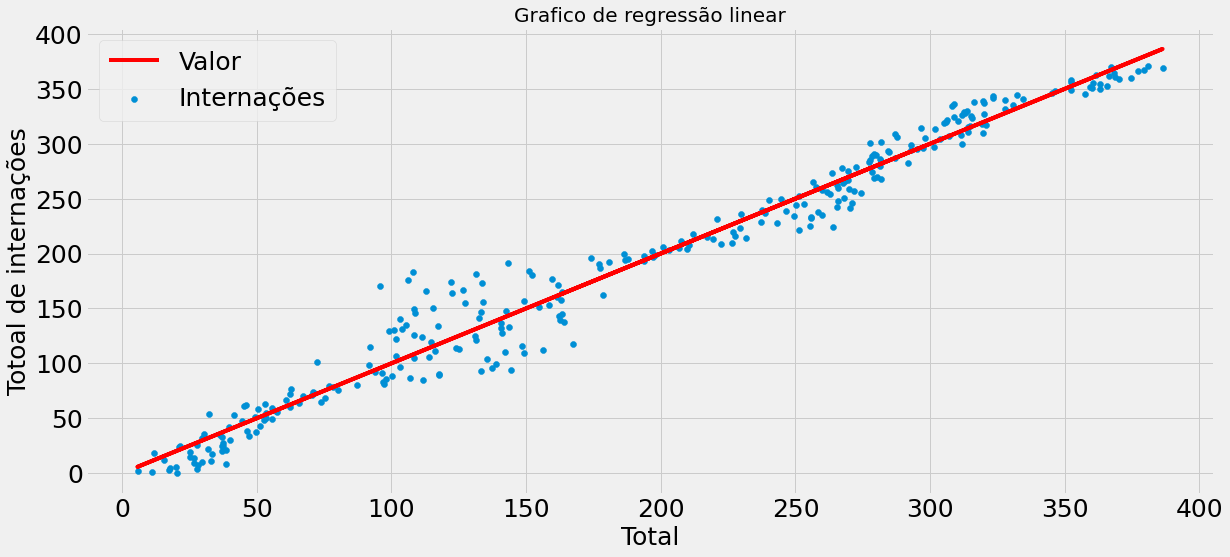

In [177]:
# Grafico de regress√£o linear

plt.figure(figsize=(18, 8))
plt.scatter(pred, y_train)
plt.plot(pred, model_linear.predict(x_train), color = "red")
plt.title("Grafico de regress√£o linear", fontsize = 20)
plt.xlabel("Total")
plt.ylabel("Totoal de interna√ß√µes")
plt.legend(["Valor", "Interna√ß√µes"])

# 7.2) Distribui√ß√£o de Frequ√™ncias dos Res√≠duos

<AxesSubplot:title={'center':'Distribui√ß√£o de Frequ√™ncias dos Res√≠duos'}, xlabel='Interna√ß√µes', ylabel='Density'>

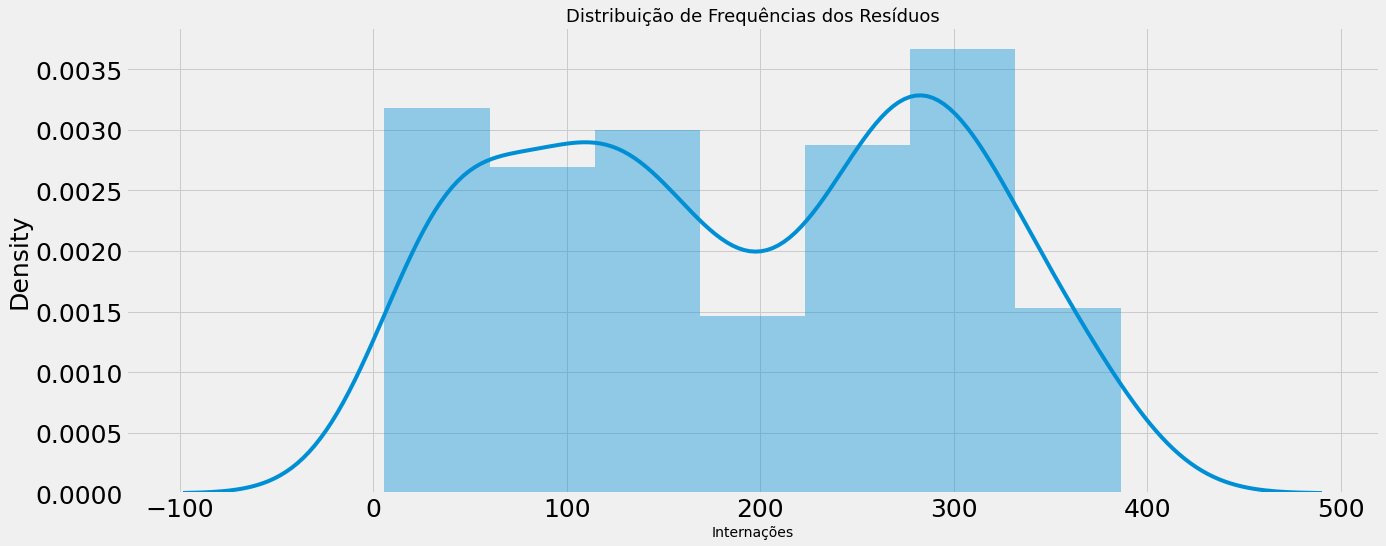

In [178]:
# Gr√°fico de distribui√ß√£o Frequ√™ncias

ax = sns.distplot(pred)
ax.figure.set_size_inches(20, 8)
ax.set_title('Distribui√ß√£o de Frequ√™ncias dos Res√≠duos', fontsize=18)
ax.set_xlabel('Interna√ß√µes', fontsize=14)
ax

# 7.3) M√©tricas para o modelo de regress√£o linear

- RMSE: Raiz do erro quadr√°tico m√©dio 
- MAE: Erro absoluto m√©dio  
- MSE: Erro m√©dio quadr√°tico
- MAPE: Erro Percentual Absoluto M√©dio
- R2: O R-Quadrado, ou Coeficiente de Determina√ß√£o, √© uma m√©trica que visa expressar a quantidade da varian√ßa dos dados.

In [179]:
# Importando bibliotecas verifica√ß√µes das m√©tricas 

from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, model_linear_pred))
mae = mean_absolute_error(y_test, model_linear_pred)
mape = mean_absolute_percentage_error(y_test, model_linear_pred)
mse = mean_squared_error(y_test, model_linear_pred)
r2 = r2_score(y_test, model_linear_pred)

pd.DataFrame([rmse, mae, mse, mape, r2], ['RMSE', 'MAE', 'MSE', "MAPE",'R¬≤'], columns=['Resultado'])

Resultado
RMSE   19.530075
MAE    14.802691
MSE   381.423812
MAPE    0.149254
R¬≤      0.960606

In [180]:
# Previs√£o de interna√ß√µes

prev = x_test[0:5]
model_pred = model_linear.predict(prev)[0]
print("Previs√£o de interna√ß√µes", model_pred)
prev

Previs√£o de interna√ß√µes 84.4085713245791


AIH_aprovadas  Valor_total  Valor_servi√ßos_hospitalares  Valor_servi√ßos_profissionais  Valor_m√©dio_AIH  Valor_m√©dio_intern  Dias_perman√™ncia  M√©dia_perman√™ncia  √ìbitos  Taxa_mortalidade  mes  ano
28        13220.0  15350893.92                  12004230.81                    3312045.63          1161.19             1170.31           62002.0                4.7      79                 1    2    1
12        15576.0  20774806.62                  16189665.49                    4585141.13          1333.77             1352.26           91424.0                6.0     140                 1    5    1
12        14322.0  20181200.29                  15622371.88                    4457151.31          1409.10             1429.26           86429.0                6.1     108                 1    3    2
4          3739.0   2740088.01                   2005694.89                     734393.12           732.84              732.84           18281.0                4.9      18                 0    9    1
1          9498.0   8328186.64                   6687975.13                    1628627.79           876.84              876.84           46239.0                4.9      55                 0    1    1

# 7.4) Modelo 02

- Nesse segundo modelo estamos prevendo o n√∫mero de √≥bitos utilizando modelo de regress√£o linear.

In [181]:
# Criando uma Series (pandas) para armazenar n√∫meros de √≥bitos

test = data_1['√ìbitos'] # Vari√°vel para teste
train = data_1.drop('√ìbitos', axis=1) # Vari√°vel para treino

In [182]:
# Total de linhas e colunas dados vari√°vel train

train.shape

(377, 12)

In [183]:
# Total de linhas e colunas dados vari√°vel test

test.shape

(377,)

# 7.5) Escalonamento dos dados

In [184]:
# Importando a biblioteca sklearn para o escalonamneto dos dados

from sklearn.preprocessing import StandardScaler

scaler_pre = StandardScaler() # Inicializando o escalonamento
scaler_pre_fit_train = scaler_pre.fit_transform(train) # Treinamento com a fun√ß√£o fit_transform com a vari√°vel x
scaler_pre_fit_train # Imprimindo o valor do escalonamento

array([[-1.06079618, -0.646678  , -0.62641762, ..., -0.2878915 ,
         0.99477129,  1.21666066],
       [-0.23675307, -0.49147487, -0.52357938, ..., -0.2878915 ,
         0.99477129,  1.21666066],
       [-1.36634026, -0.76997632, -0.73004379, ..., -0.2878915 ,
         0.99477129,  1.21666066],
       ...,
       [-0.69043973, -0.5256219 , -0.52956897, ...,  0.68990214,
        -0.65879474,  1.21666066],
       [ 0.18915686, -0.24861526, -0.22636185, ..., -0.2878915 ,
        -0.65879474,  1.21666066],
       [-0.0237981 , -0.4388296 , -0.47609154, ..., -1.26568513,
        -0.65879474,  1.21666066]])

# 7.6) Modelo treinado para x, y valor

- 20% para os dados de treino
- 80% para teste
- Random state igual a zero

In [185]:
# Importa√ß√£o da biblioteca sklearn para treino e teste do modelo

from sklearn.model_selection import train_test_split 

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(train, # Vari√°vel train
                                                    test, # Vari√°vel test
                                                    test_size=0.2, # Divivindo os dados em 20% para treino e 80% para teste
                                                    random_state = 0) # Random state igual a zero

In [186]:
# Total de linhas e colunas e linhas dos dados de treino x

x_train_1.shape

(301, 12)

In [187]:
# Total de linhas dos dados de treino y

y_train_1.shape

(301,)

In [188]:
# Total de linhas e colunas dos dados de treino x teste 

x_test_1.shape

(76, 12)

In [189]:
# Total de linhas e colunas dos dados de treino y teste 

y_test_1.shape

(76,)

# 7.7) Modelo regress√£o linear - 2

In [190]:
# Modelo regress√£o linear - 2 √ìbitos
# Importa√ß√£o da biblioteca sklearn o modelo regress√£o linear

from sklearn.linear_model import LinearRegression

# Nome do algoritmo M.L
model_linear_2 = LinearRegression() 

# Treinamento do modelo
model_linear_fit = model_linear_2.fit(x_train_1, y_train_1)

# Score do modelo
model_linear_score_2 = model_linear_2.score(x_train_1, y_train_1)

print("Modelo - Regress√£o linear: %.2f" % (model_linear_score_2 * 100))

Modelo - Regress√£o linear: 97.75


In [191]:
# Previs√£o do modelo

model_linear_pred_2 = model_linear_2.predict(x_test_1)
model_linear_pred_2

array([ 86.73711843, 127.58740145, 101.76312528,  10.67444806,
        50.35389489, 167.94808201, 166.5112341 ,  -3.76205844,
        85.03300399, 160.86284244,  26.69264217, 272.24806181,
       184.1628062 ,  39.3693668 , 182.10246743, 172.56603891,
        16.79529982, 198.25299428, 135.03064286, 143.54152891,
       234.48325746, 174.33261017, 120.45316781, 145.24980053,
       244.7229236 , 193.61665903,  40.26219978, 124.91128122,
       178.09740501, 134.1328202 , 121.90842328, 220.79615179,
       244.49296093, 153.13347187,  55.9800286 , 165.46994943,
       142.0156608 , 150.6357909 , 159.92441292,  48.54908397,
       198.13089003, 279.86199607, 140.97500838, 256.68338294,
       358.48710254, 318.27010713, 135.44822693, 205.69871271,
        52.35841119, 258.98659751,  38.01565749, 132.57456052,
       314.85774593, 308.29273694,  24.99434817, 225.15694734,
        24.87706959, 254.64710625, 104.95664692, 183.26664613,
       199.41901043, 108.79447026, 312.8083306 , 291.08

In [192]:
# O intercepto representa o efeito m√©dio em tendo todas as vari√°veis explicativas exclu√≠das do modelo. 
# De forma mais simples, o intercepto representa o efeito m√©dio em s√£o iguais a zero.

model_linear_2.intercept_

-19.723512918188135

In [193]:
# Os coeficientes de regress√£o  ùõΩ2 ,  ùõΩ3  e  ùõΩ4  s√£o conhecidos como coeficientes parciais de regress√£o ou coeficientes parciais angulares. 
# Considerando o n√∫mero de vari√°veis explicativas de nosso modelo, seu significado seria o seguinte

model_linear_2.coef_

array([ 7.47976029e-01,  1.51966439e-03, -3.74701948e-06,  4.46266272e-06,
       -4.76048940e-06, -4.46078199e-01,  4.88545305e-01,  2.16453395e-06,
       -5.49944997e+00,  1.40203757e+01, -7.86378552e-02,  2.83505497e+00])

In [194]:
# O coeficiente de determina√ß√£o (R¬≤) √© uma medida resumida que diz quanto a linha de regress√£o ajusta-se aos dados. 
# √â um valor entra 0 e 1.

print('R¬≤ = {}'.format(model_linear_2.score(x_train_1, y_train_1).round(2)))

R¬≤ = 0.98


In [195]:
# Previs√£o do modelo 

pred_2 = model_linear_2.predict(x_train_1)
pred_2 = y_train - pred_2
pred_2

21    -6.822369
20    18.947128
1     20.285681
12   -23.547938
2     18.115515
        ...    
1      1.416452
5     52.470821
12    -2.388912
25    18.044090
13    -1.286805
Name: Interna√ß√µes, Length: 301, dtype: float64

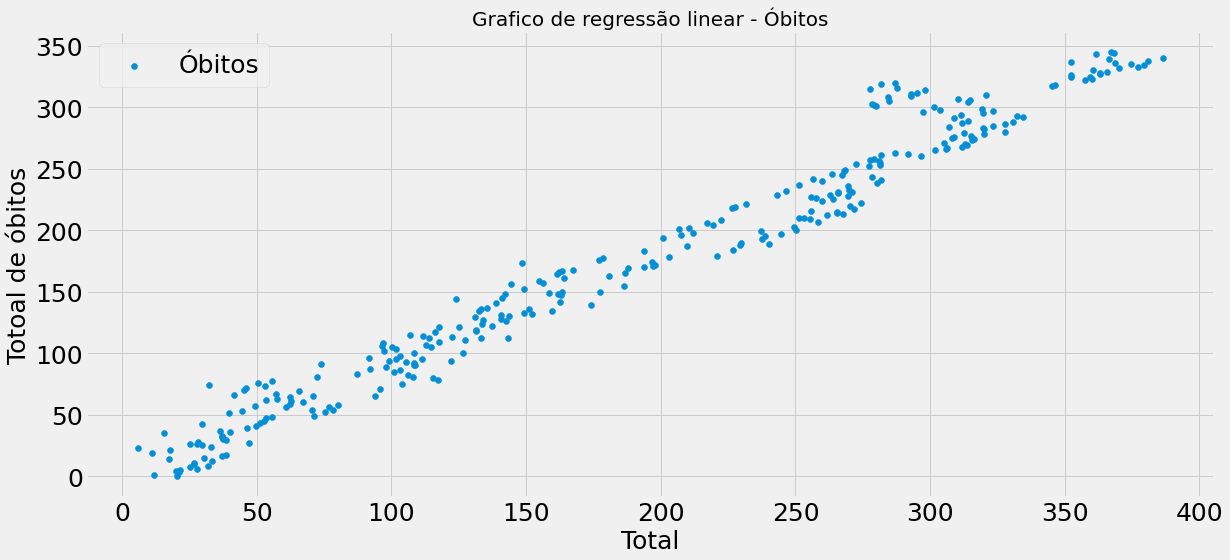

In [196]:
# Grafico de regress√£o linear

plt.figure(figsize=(18, 8))
plt.scatter(pred, y_train_1)
plt.title("Grafico de regress√£o linear - √ìbitos", fontsize = 20)
plt.xlabel("Total")
plt.ylabel("Totoal de √≥bitos")
plt.legend(["√ìbitos", "Valor"])

<AxesSubplot:title={'center':'Distribui√ß√£o de Frequ√™ncias dos Res√≠duos'}, xlabel='Interna√ß√µes', ylabel='Density'>

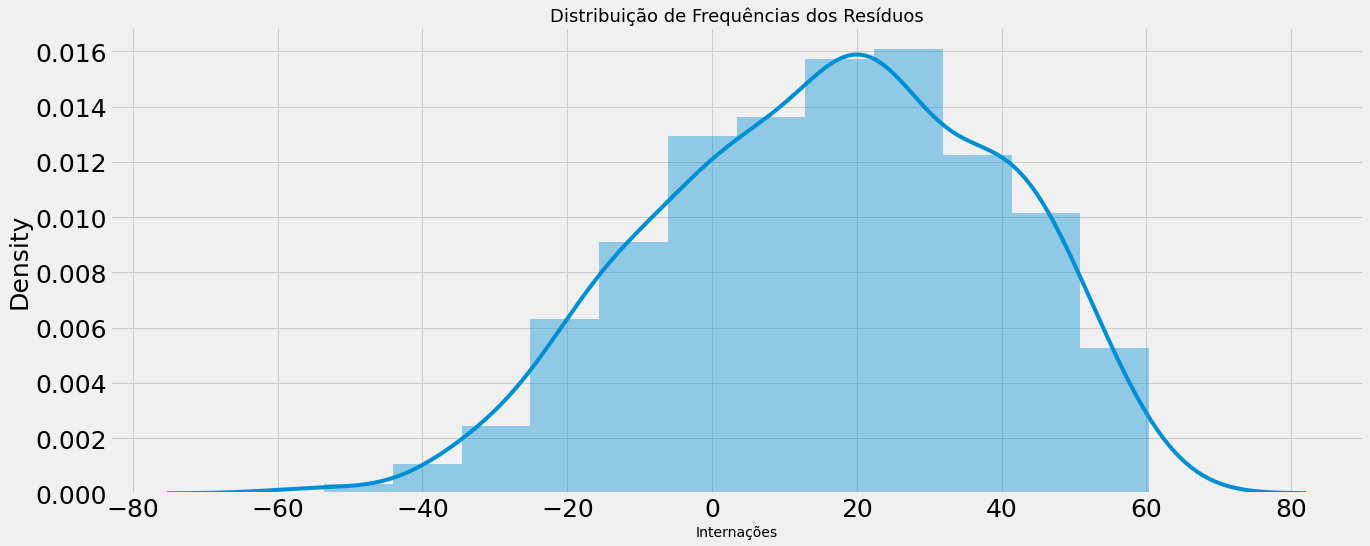

In [197]:
# Distribui√ß√£o de Frequ√™ncias dos Res√≠duos

ax = sns.distplot(pred_2)
ax.figure.set_size_inches(20, 8)
ax.set_title('Distribui√ß√£o de Frequ√™ncias dos Res√≠duos', fontsize=18)
ax.set_xlabel('Interna√ß√µes', fontsize=14)
ax

# 7.8) M√©tricas para o modelo 2 regress√£o linear

- RMSE: Raiz do erro quadr√°tico m√©dio 
- MAE: Erro absoluto m√©dio  
- MSE: Erro m√©dio quadr√°tico
- MAPE: Erro Percentual Absoluto M√©dio
- R2: O R-Quadrado, ou Coeficiente de Determina√ß√£o, √© uma m√©trica que visa expressar a quantidade da varian√ßa dos dados.

In [198]:
# Verifica√ß√µes das m√©tricas 

rmse = np.sqrt(mean_squared_error(y_test, model_linear_pred_2))
mae = mean_absolute_error(y_test, model_linear_pred_2)
mape = mean_absolute_percentage_error(y_test, model_linear_pred_2)
mse = mean_squared_error(y_test, model_linear_pred_2)
r2 = r2_score(y_test, model_linear_pred_2)

pd.DataFrame([rmse, mae, mse, mape, r2], ['RMSE', 'MAE', 'MSE', "MAPE",'R¬≤'], columns=['Resultado'])

Resultado
RMSE   25.757131
MAE    21.715011
MSE   663.429819
MAPE    0.191711
R¬≤      0.931480

In [199]:
# Previs√£o de obitos

prev_2 = x_test_1[0:5]
model_pred_2 = model_linear_2.predict(prev_2)[0]
print("Previs√£o de √≥bitos", model_pred_2)
prev_2

Previs√£o de √≥bitos 86.73711843263169


Interna√ß√µes  AIH_aprovadas  Valor_total  Valor_servi√ßos_hospitalares  Valor_servi√ßos_profissionais  Valor_m√©dio_AIH  Valor_m√©dio_intern  Dias_perman√™ncia  M√©dia_perman√™ncia  Taxa_mortalidade  mes  ano
28           82        13220.0  15350893.92                  12004230.81                    3312045.63          1161.19             1170.31           62002.0                4.7                 1    2    1
12          136        15576.0  20774806.62                  16189665.49                    4585141.13          1333.77             1352.26           91424.0                6.0                 1    5    1
12           95        14322.0  20181200.29                  15622371.88                    4457151.31          1409.10             1429.26           86429.0                6.1                 1    3    2
4            31         3739.0   2740088.01                   2005694.89                     734393.12           732.84              732.84           18281.0                4.9                 0    9    1
1            69         9498.0   8328186.64                   6687975.13                    1628627.79           876.84              876.84           46239.0                4.9                 0    1    1

# 7.9) Modelo 03: Regress√£o linear

- Nesse modelo estamos prevendo o valor M√©dio de AIH pelos pr√≥ximos 6 meses utilizando modelo de regress√£o linear.

# Treino e Teste

- Treino e teste da base de dados da coluna Interna√ß√µes

In [200]:
y2 = data_1['AIH_aprovadas'] # Vari√°vel para y2
x1 = data_1.drop('AIH_aprovadas', axis=1) # Vari√°vel para x1

In [201]:
# Total de linhas e colunas dados vari√°vel x

x1.shape

(377, 12)

In [202]:
# Total de linhas e colunas dados vari√°vel y

y2.shape

(377,)

# 8.0) Escalonamento dos dados

In [203]:
# Importando a biblioteca sklearn para o escalonamneto dos dados

from sklearn.preprocessing import StandardScaler 

scaler_pre = StandardScaler() # Inicializando o escalonamento
scaler_pre_fit_train = scaler_pre.fit_transform(x1) # Treinamento com a fun√ß√£o fit_transform com a vari√°vel x1
scaler_pre_fit_train # Imprimindo o valor do escalonamento

array([[-1.06079618, -0.62641762, -0.61761819, ..., -0.2878915 ,
         0.99477129,  1.21666066],
       [-0.23675307, -0.52357938, -0.52470231, ..., -0.2878915 ,
         0.99477129,  1.21666066],
       [-1.36634026, -0.73004379, -0.72728127, ..., -0.2878915 ,
         0.99477129,  1.21666066],
       ...,
       [-0.69043973, -0.52956897, -0.52281759, ...,  0.68990214,
        -0.65879474,  1.21666066],
       [ 0.18915686, -0.22636185, -0.22618578, ..., -0.2878915 ,
        -0.65879474,  1.21666066],
       [-0.0237981 , -0.47609154, -0.47083944, ..., -1.26568513,
        -0.65879474,  1.21666066]])

# 9.0) Modelo treinado para x, y valor

- 20% para os dados de treino
- 80% para teste
- Random state igual a zero

In [204]:
# Importa√ß√£o da biblioteca sklearn para treino e teste do modelo

from sklearn.model_selection import train_test_split 

train_x, test_x, train_y, test_y = train_test_split(train, # Vari√°vel x1
                                                    test, # Vari√°vel y2
                                                    test_size=0.2, # Divivindo os dados em 20% para treino e 80% para teste
                                                    random_state = 0) # Random state igual a zero

In [205]:
# Total de linhas e colunas e linhas dos dados de treino x

train_x.shape

(301, 12)

In [206]:
# Total de linhas dos dados de treino y

train_y.shape

(301,)

In [207]:
# Total de linhas e colunas dos dados de treino x teste 

test_x.shape

(76, 12)

In [208]:
# Total de linhas e colunas dos dados de treino y teste 

test_y.shape

(76,)

In [209]:
# Modelo regress√£o linear - 3 Valor M√©dio de AIH
# Importa√ß√£o da biblioteca sklearn o modelo regress√£o linear

from sklearn.linear_model import LinearRegression

# Nome do algoritmo M.L
model_linear_3 = LinearRegression() 

# Treinamento do modelo
model_linear_fit = model_linear_3.fit(train_x, train_y)

# Score do modelo
model_linear_score_3 = model_linear_3.score(x_train_1, y_train_1)

print("Modelo - Regress√£o linear: %.2f" % (model_linear_score_3 * 100))

Modelo - Regress√£o linear: 97.75


In [210]:
# Previs√£o do modelo

model_linear_pred_3 = model_linear_3.predict(x_test_1)
model_linear_pred_3

array([ 86.73711843, 127.58740145, 101.76312528,  10.67444806,
        50.35389489, 167.94808201, 166.5112341 ,  -3.76205844,
        85.03300399, 160.86284244,  26.69264217, 272.24806181,
       184.1628062 ,  39.3693668 , 182.10246743, 172.56603891,
        16.79529982, 198.25299428, 135.03064286, 143.54152891,
       234.48325746, 174.33261017, 120.45316781, 145.24980053,
       244.7229236 , 193.61665903,  40.26219978, 124.91128122,
       178.09740501, 134.1328202 , 121.90842328, 220.79615179,
       244.49296093, 153.13347187,  55.9800286 , 165.46994943,
       142.0156608 , 150.6357909 , 159.92441292,  48.54908397,
       198.13089003, 279.86199607, 140.97500838, 256.68338294,
       358.48710254, 318.27010713, 135.44822693, 205.69871271,
        52.35841119, 258.98659751,  38.01565749, 132.57456052,
       314.85774593, 308.29273694,  24.99434817, 225.15694734,
        24.87706959, 254.64710625, 104.95664692, 183.26664613,
       199.41901043, 108.79447026, 312.8083306 , 291.08

In [211]:
# O intercepto representa o efeito m√©dio em tendo todas as vari√°veis explicativas exclu√≠das do modelo. 
# De forma mais simples, o intercepto representa o efeito m√©dio em s√£o iguais a zero.

model_linear_3.intercept_

-19.723512918188135

In [212]:
# Os coeficientes de regress√£o  ùõΩ2 ,  ùõΩ3  e  ùõΩ4  s√£o conhecidos como coeficientes parciais de regress√£o ou coeficientes parciais angulares. 
# Considerando o n√∫mero de vari√°veis explicativas de nosso modelo, seu significado seria o seguinte.

model_linear_3.coef_

array([ 7.47976029e-01,  1.51966439e-03, -3.74701948e-06,  4.46266272e-06,
       -4.76048940e-06, -4.46078199e-01,  4.88545305e-01,  2.16453395e-06,
       -5.49944997e+00,  1.40203757e+01, -7.86378552e-02,  2.83505497e+00])

In [213]:
# O coeficiente de determina√ß√£o (R¬≤) √© uma medida resumida que diz quanto a linha de regress√£o ajusta-se aos dados. 
# √â um valor entra 0 e 1.

print('R¬≤ = {}'.format(model_linear_3.score(x_train_1, y_train_1).round(2)))

R¬≤ = 0.98


In [214]:
# Previs√£o do modelo

pred_2 = model_linear_3.predict(train_x)
pred_2 = y_train - pred_2
pred_2

21    -6.822369
20    18.947128
1     20.285681
12   -23.547938
2     18.115515
        ...    
1      1.416452
5     52.470821
12    -2.388912
25    18.044090
13    -1.286805
Name: Interna√ß√µes, Length: 301, dtype: float64

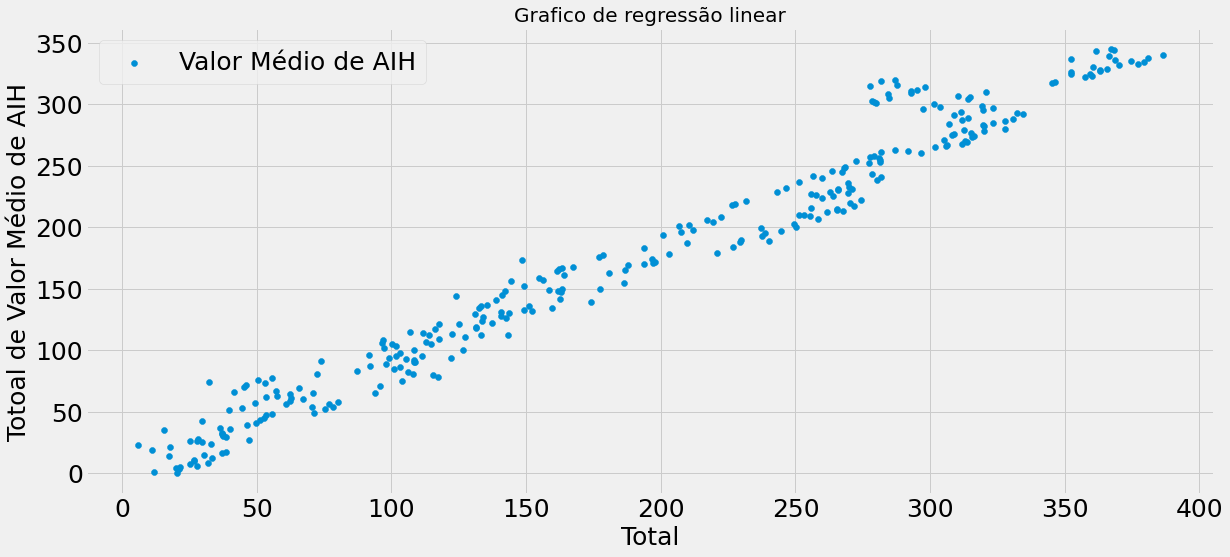

In [215]:
# Grafico de regress√£o linear

plt.figure(figsize=(18, 8))
plt.scatter(pred, train_y)
plt.title("Grafico de regress√£o linear", fontsize = 20)
plt.xlabel("Total")
plt.ylabel("Totoal de Valor M√©dio de AIH")
plt.legend(["Valor M√©dio de AIH", "Valor"])

<AxesSubplot:title={'center':'Distribui√ß√£o de Frequ√™ncias dos Res√≠duos'}, xlabel='Interna√ß√µes', ylabel='Density'>

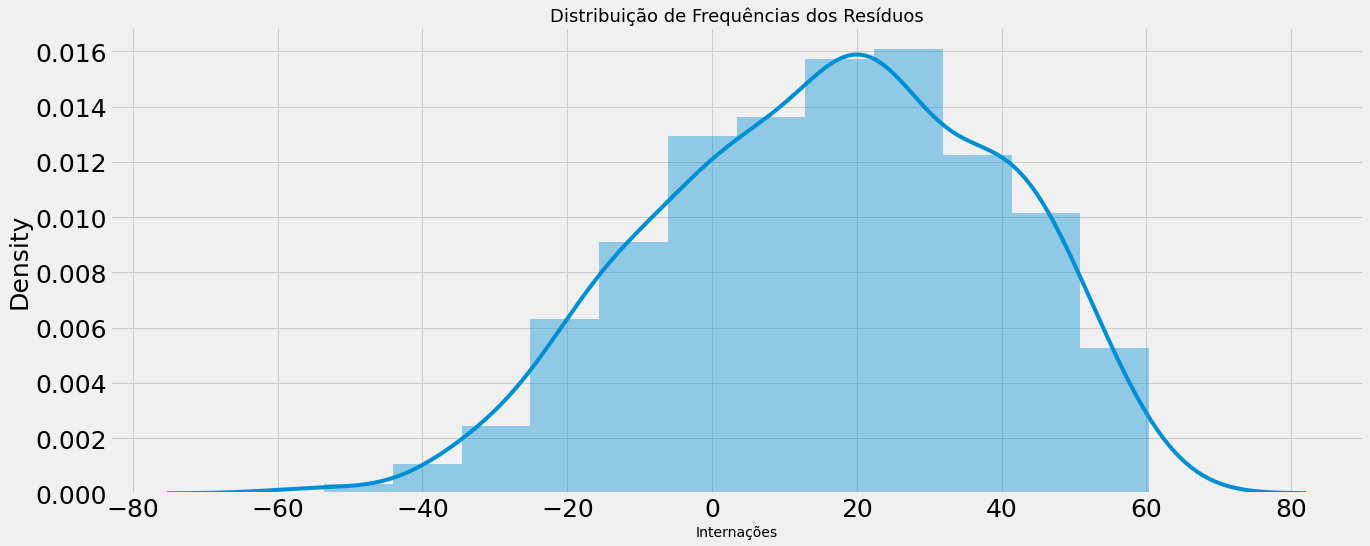

In [216]:
# Distribui√ß√£o de Frequ√™ncias dos Res√≠duos

ax = sns.distplot(pred_2)
ax.figure.set_size_inches(20, 8)
ax.set_title('Distribui√ß√£o de Frequ√™ncias dos Res√≠duos', fontsize=18)
ax.set_xlabel('Interna√ß√µes', fontsize=14)
ax

# 1.0) M√©tricas para o modelo 3 regress√£o linear 

- RMSE: Raiz do erro quadr√°tico m√©dio 
- MAE: Erro absoluto m√©dio  
- MSE: Erro m√©dio quadr√°tico
- MAPE: Erro Percentual Absoluto M√©dio
- R2: O R-Quadrado, ou Coeficiente de Determina√ß√£o, √© uma m√©trica que visa expressar a quantidade da varian√ßa dos dados.

In [217]:
# Verifica√ß√µes das m√©tricas 

rmse = np.sqrt(mean_squared_error(y_test, model_linear_pred_3))
mae = mean_absolute_error(y_test, model_linear_pred_3)
mape = mean_absolute_percentage_error(y_test, model_linear_pred_3)
mse = mean_squared_error(y_test, model_linear_pred_3)
r2 = r2_score(y_test, model_linear_pred_3)

pd.DataFrame([rmse, mae, mse, mape, r2], ['RMSE', 'MAE', 'MSE', "MAPE",'R¬≤'], columns=['Resultados'])

Resultados
RMSE   25.757131
MAE    21.715011
MSE   663.429819
MAPE    0.191711
R¬≤      0.931480

In [218]:
# Previs√£o valor M√©dio de AIH

prev_3 = x_test_1[0:10]
model_pred_3 = model_linear_3.predict(prev_3)[0]
print("Previs√£o total valor M√©dio de AIH:", model_pred_3)
prev_3

Previs√£o total valor M√©dio de AIH: 86.73711843263169


Interna√ß√µes  AIH_aprovadas  Valor_total  Valor_servi√ßos_hospitalares  Valor_servi√ßos_profissionais  Valor_m√©dio_AIH  Valor_m√©dio_intern  Dias_perman√™ncia  M√©dia_perman√™ncia  Taxa_mortalidade  mes  ano
28           82        13220.0  15350893.92                  12004230.81                    3312045.63          1161.19             1170.31           62002.0                4.7                 1    2    1
12          136        15576.0  20774806.62                  16189665.49                    4585141.13          1333.77             1352.26           91424.0                6.0                 1    5    1
12           95        14322.0  20181200.29                  15622371.88                    4457151.31          1409.10             1429.26           86429.0                6.1                 1    3    2
4            31         3739.0   2740088.01                   2005694.89                     734393.12           732.84              732.84           18281.0                4.9                 0    9    1
1            69         9498.0   8328186.64                   6687975.13                    1628627.79           876.84              876.84           46239.0                4.9                 0    1    1
20          189        19394.0  24170075.47                  18930543.59                    4990372.56          1246.27             1250.52           88870.0                4.6                 1    1    1
20          186        18969.0  24502056.39                  19394723.90                    4927374.81          1291.69             1297.30           93784.0                5.0                 1    2    1
6            16         3438.0   2139141.93                   1534159.23                     604982.70           622.21              622.21           16494.0                4.8                 0    1    1
28           84        13518.0  15353997.67                  11877147.03                    3360387.25          1135.82             1144.88           61001.0                4.5                 1    2    0
31          185        18886.0  20187082.38                  16156487.44                    4030594.94          1068.89             1075.78          109260.0                5.8                 1    7    2

# 1.1) Resultados final dos modelos

In [219]:
# Exibindo um comparativo dos modelos de regress√£o linear

modelos = pd.DataFrame({
    
    "Modelos" :[ "Modelo regress√£o linear 1", 
                "Modelo regress√£o linear 2", 
                "Modelo regress√£o linear 3"],

    "Acur√°cia" :[model_linear_score_1, 
                 model_linear_score_2, 
                 model_linear_score_3]})

modelos.sort_values(by = "Acur√°cia", ascending = True)

Modelos  Acur√°cia
0  Modelo regress√£o linear 1  0.971866
1  Modelo regress√£o linear 2  0.977523
2  Modelo regress√£o linear 3  0.977523

In [220]:
# Salvando modelo de regress√£o linear

import pickle

with open('model_linear_pred.pkl', 'wb') as file:
    pickle.dump(model_linear_pred, file)
    
with open('model_linear_pred_2.pkl', 'wb') as file:
    pickle.dump(model_linear_pred_2, file)
    
with open('model_linear_pred_3.pkl', 'wb') as file:
    pickle.dump(model_linear_pred_3, file)

# Conclus√£o do modelo machine learning

Pela an√°lise dos modelos, modelo 1 teve melhor resultado que os demais, atigindo uma acur√°cia de 97.18% ou seja capaz de acertar as previs√µes de interna√ß√µes, √≥bitos, valor do AIH. De acordo com an√°lise realizada.  